In [131]:
# –í–æ—Ä–æ–±—å–µ–≤ –ê–Ω–¥—Ä–µ–π –í–∞—Ä–∏–∞–Ω—Ç 6
# –ò–º–ø–æ—Ä—Ç –ø–∞–∫–µ—Ç–æ–≤
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## –ó–∞–¥–∞–Ω–∏–µ1. –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö.
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≤–∏–∑—É–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
(–ø—Ä–∏–∑–Ω–∞–∫–∞) –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö. –ü—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö
–¥–∏–∞–≥—Ä–∞–º–º. –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å
–ø–æ—Å—Ç—Ä–æ–µ–Ω—ã —Å—Ç–æ–ª–±—á–∞—Ç–∞—è –∏ –∫—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º—ã, –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö
–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö ‚Äì –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞, –æ—Ü–µ–Ω–∫–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏
–¥–∏–∞–≥—Ä–∞–º–º–∞ ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏¬ª.sns

In [132]:
data = pd.read_excel('./first_practice_dataframe.xlsx', usecols=('cat13_productType',
                                                                 'cat7_motivesForEmployeesToWorkBetter',
                                                                 'num1_7', 'num2_7', 'num3_7'))

In [133]:
# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –≤—Å–µ –ø—Ä–∞–≤–∏–ª—å–Ω–æ —Å—á–∏—Ç–∞–ª–æ—Å—å
print(data.shape)
print(data.head(10))
print(data.describe().T)

(1000, 5)
  cat7_motivesForEmployeesToWorkBetter cat13_productType       num1_7  \
0                      Peer motivation              Wood   928.003264   
1    Professional growth opportunities           Plastic   942.683617   
2                      peer motivation                 -   986.827992   
3                          Recognition           Plastic   940.824645   
4                          Recognition             metal   908.794236   
5                Friendly work culture             Metal   872.609360   
6    Professional growth opportunities           Plastic   923.567969   
7                          recognition           Plastic -9999.000000   
8    Professional growth opportunities             Metal   939.357979   
9                      peer motivation           Plastic   905.228980   

       num2_7      num3_7  
0  230.711895    63.10306  
1  -54.555626           -  
2  159.587517  100.871834  
3  451.728967   174.60695  
4  186.329695  425.314903  
5 -189.723934   16

–°—Ä–∞–∑—É –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –Ω–µ –≤—ã–≤–µ–ª–∞—Å—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num3_7. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –æ–Ω –∏–º–µ–µ—Ç –Ω–µ —á–∏—Å–ª–æ–≤–æ–π —Ç–∏–ø.

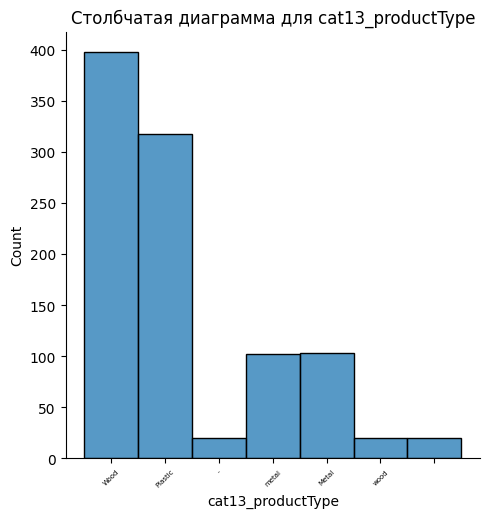

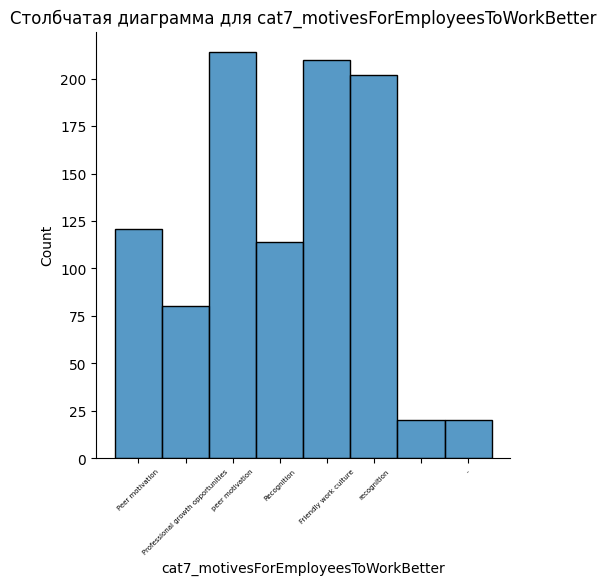

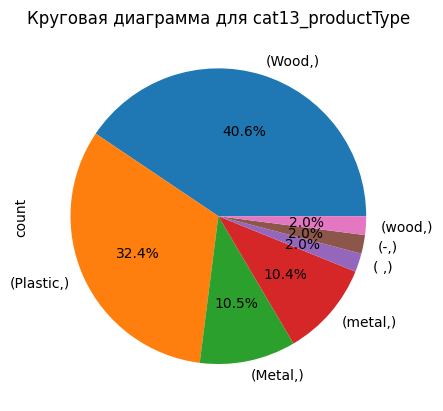

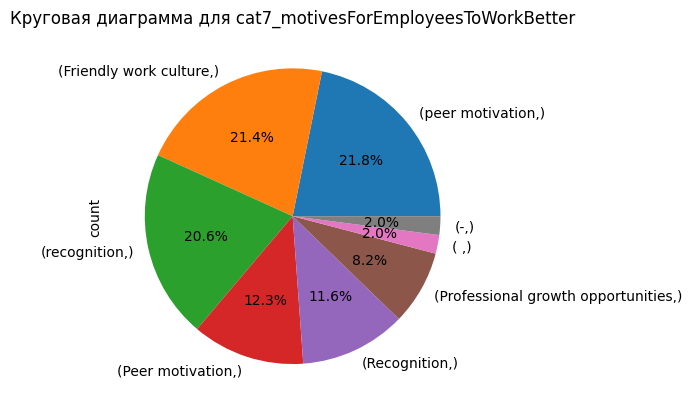

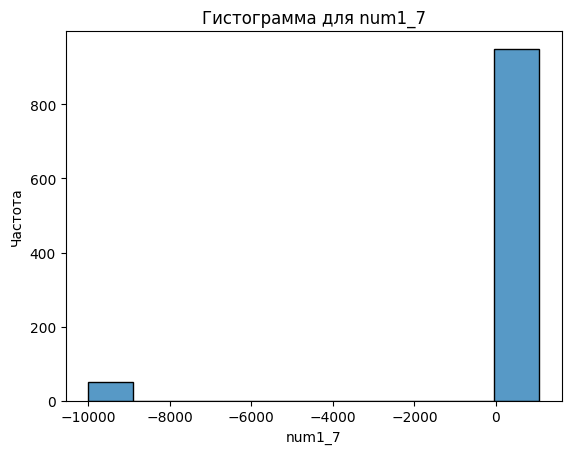

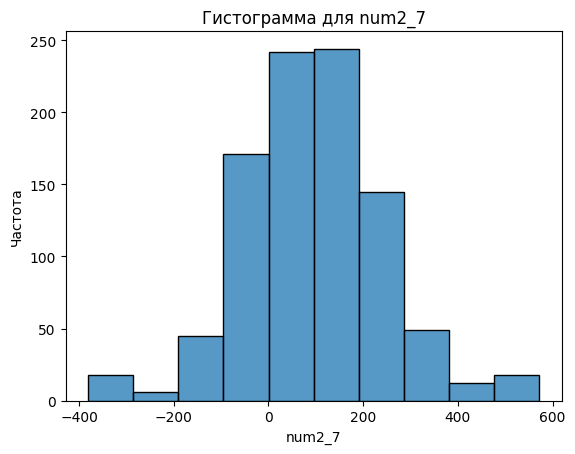

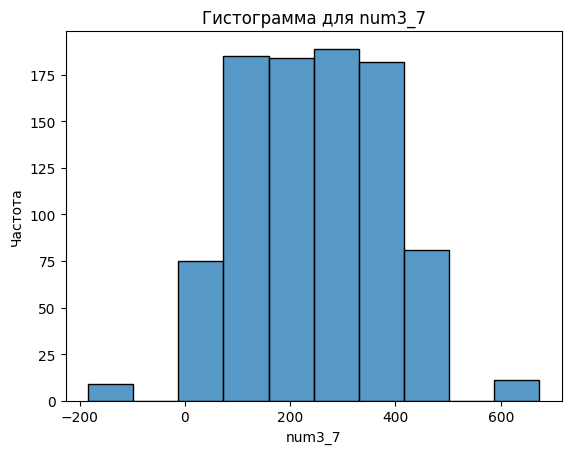

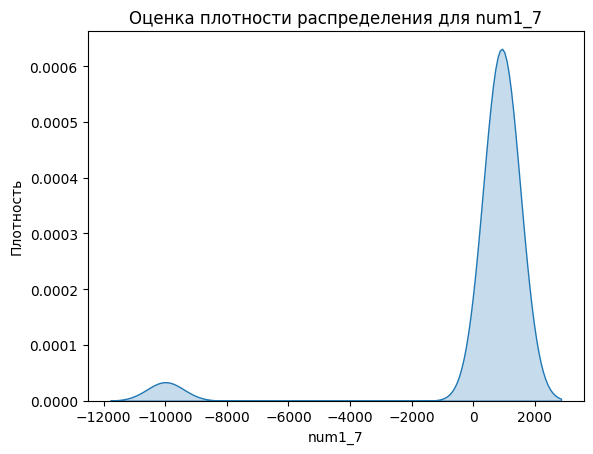

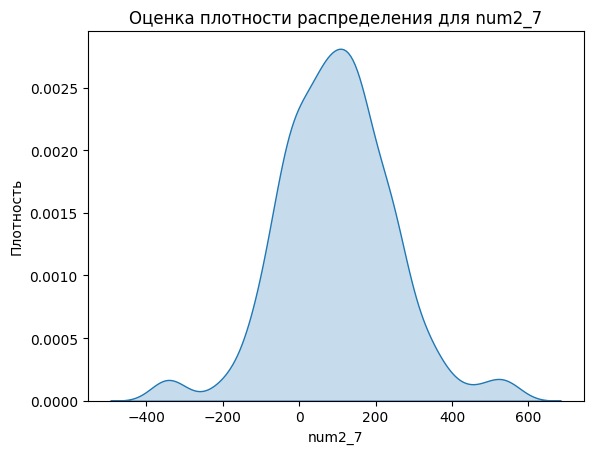

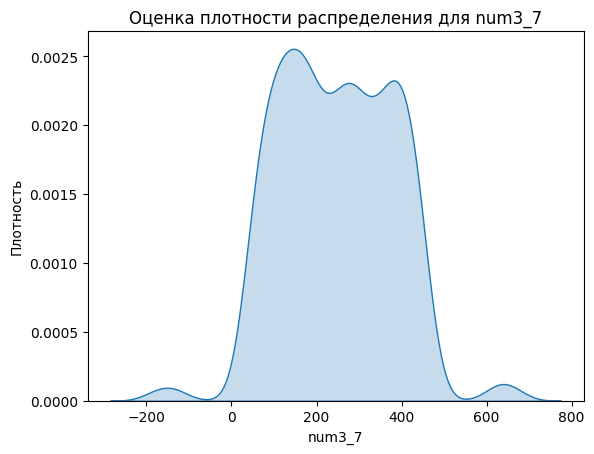

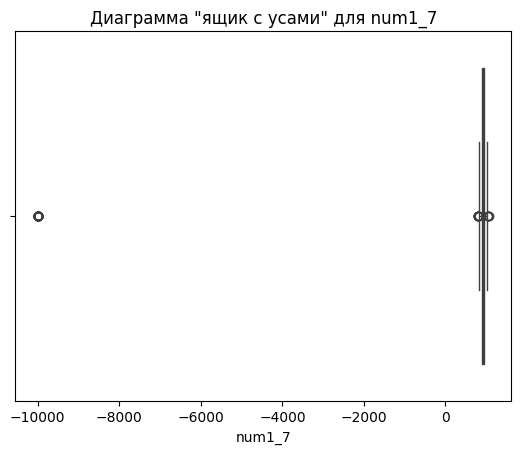

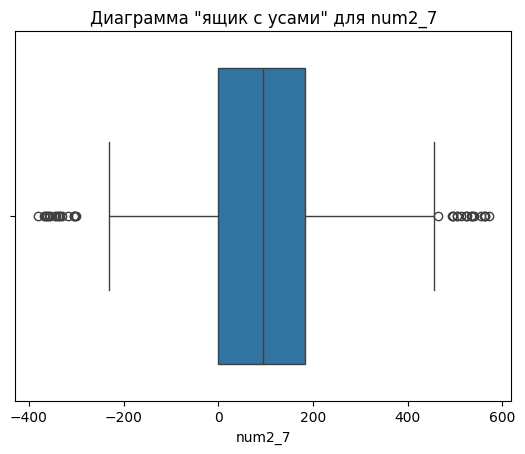

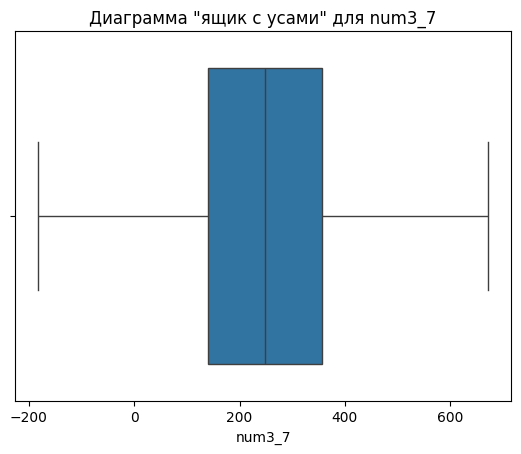

In [134]:
# –ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã–≤–æ–¥–∞ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –∏ –∫—Ä—É–≥–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

# –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –∑–∞–º–µ–Ω–∏–º –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–æ–ª–æ—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –Ω–∞ nan

# –°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
def construct_histogram(array, data):
    for ar in array:
        sns.displot(data[ar])
        plt.title(f'–°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –¥–ª—è {ar}')
        plt.xticks(rotation=45, fontsize=5)
        plt.show()

# –ö—Ä—É–≥–æ–≤–∞—è
def construct_circle(array, data):
    for ar in array:
        data[[ar]].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω–æ –∑–Ω–∞—á–µ–Ω–∏—è (—Å–µ—Ä–∏—è)
        plt.title(f'–ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –¥–ª—è {ar}')
        plt.show()


# construct_histogram(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)
# construct_circle(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)

# –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –≤—ã–≤–æ–¥–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã, –æ—Ü–µ–Ω–∫–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –¥–∏–∞–≥—Ä–∞–º–º—ã ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏" –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
def construct_hist(array, data):
    for ar in array:
        data_mas = data.copy()[ar].replace(['-', ' '], np.nan)
        sns.histplot(data_mas, kde=False, bins=10)
        plt.title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è {ar}')
        plt.xlabel(ar)
        plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        plt.show()

# –û—Ü–µ–Ω–∫–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏
def construct_mark(array, data):
    for ar in array:
        data_mas = data.copy()[ar].replace(['-', ' '], np.nan)
        sns.kdeplot(data_mas, fill=True)
        plt.title(f'–û—Ü–µ–Ω–∫–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è {ar}')
        plt.xlabel(ar)
        plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
        plt.show()

# –Ø—â–∏–∫ —Å —É—Å–∞–º–∏
def construct_box(array, data):
    for ar in array:
        data_mas = data.copy().replace(['-', ' '], np.nan)
        sns.boxplot(x=ar, data=data_mas)
        plt.title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ "—è—â–∏–∫ —Å —É—Å–∞–º–∏" –¥–ª—è {ar}')
        plt.xlabel(ar)
        plt.show()


# construct_hist(['num1_7', 'num2_7', 'num3_7'], data)
# construct_mark(['num1_7', 'num2_7', 'num3_7'], data)
# construct_box(['num1_7', 'num2_7', 'num3_7'], data)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–∑–æ–≤–∞ –≤—Å–µ—Ö —ç—Ç–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
def calls_all_diagrams(data):
    construct_histogram(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)
    construct_circle(['cat13_productType', 'cat7_motivesForEmployeesToWorkBetter'], data)
    construct_hist(['num1_7', 'num2_7', 'num3_7'], data)
    construct_mark(['num1_7', 'num2_7', 'num3_7'], data)
    construct_box(['num1_7', 'num2_7', 'num3_7'], data)

calls_all_diagrams(data)

## –ó–∞–¥–∞–Ω–∏–µ 2. –ü—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–æ–≤–µ—Ä–∫—É –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω–æ—Å—Ç–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
–ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω–æ—Å—Ç–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–æ–ª–∂–Ω–∞ –≤–∫–ª—é—á–∞—Ç—å
–ø—Ä–æ–≤–µ—Ä–∫—É —Ç–∏–ø–æ–≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤, –Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã—Ö
–∑–Ω–∞—á–µ–Ω–∏–π –∏ —Ç.–ø. –ü—Ä–∏–≤–µ—Å—Ç–∏ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫ –Ω—É–∂–Ω–æ–º—É —Ñ–æ—Ä–º–∞.—Ç—É

<Axes: >

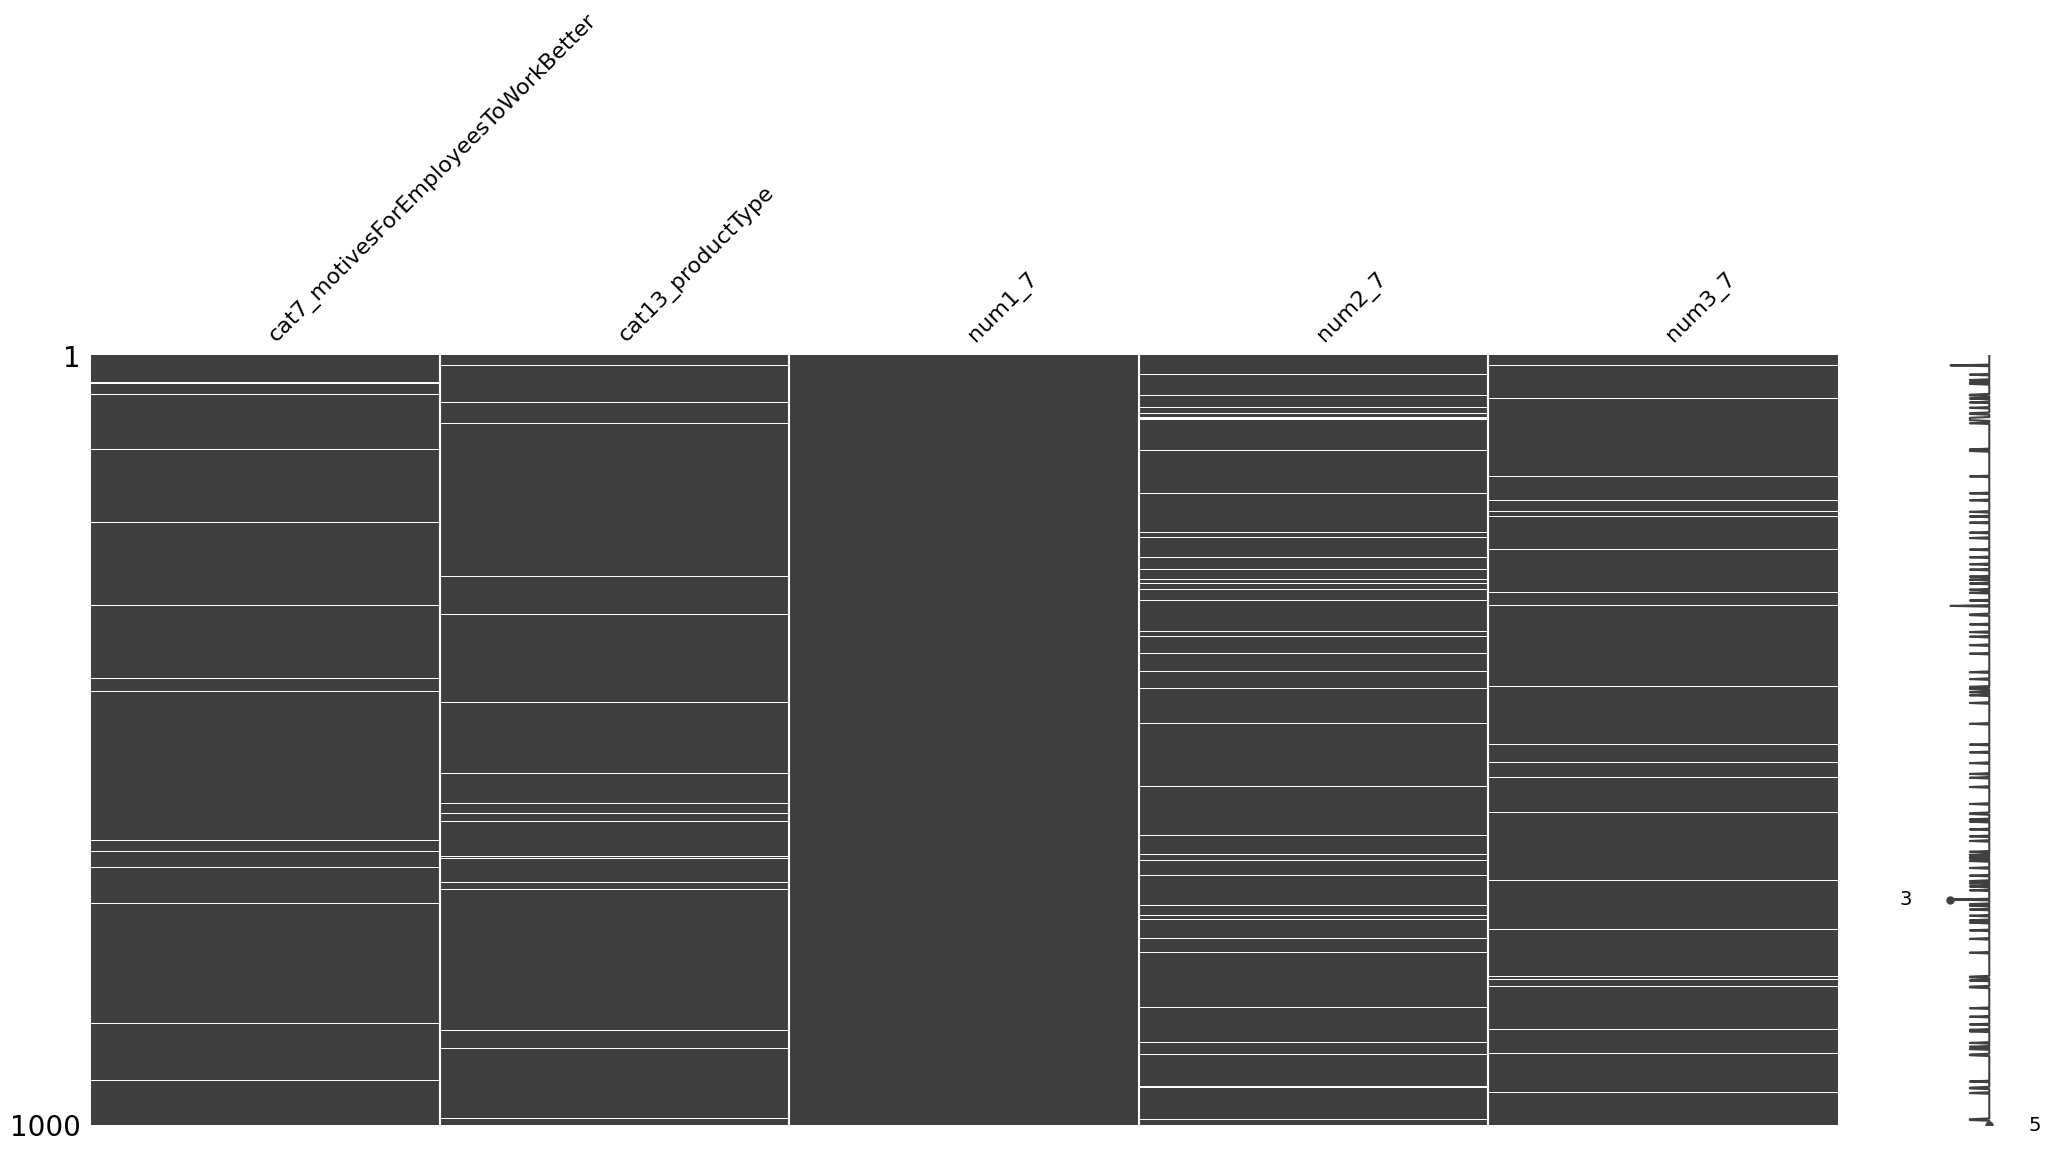

In [135]:
# –°–æ–∑–¥–∞–¥–∏–º –∫–æ–ø–∏—é –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è
data2 = data.copy()

# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
missingno.matrix(data2)

In [136]:
# –°–ø–∏—Å–æ–∫ —Å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
value_for_find = ['-', ' ', -1, -9, 0, 'nan', np.nan]

# –°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–≤–æ–¥–∏—Ç –≤—Å—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –æ dataframe
def info_table(df):
    count_rows = df.shape[0]
    
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: {df.shape}.\n")
    
    name_columns = df.columns.tolist()
    print(f"–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: {name_columns}.\n")

    general_count_isnull = df.isnull().sum().sum()
    
    print("–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:\n")

    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: {general_count_isnull}. " + 
          f"–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: {general_count_isnull/count_rows*100}\n")
    
    for k in value_for_find:
            if pd.isna(k): 
                count = df.isna().sum().sum()      
            else:
                count = (df == k).sum().sum()
            print(f"–ó–Ω–∞—á–µ–Ω–∏–µ '{k}' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: {count} —Ä–∞–∑. {count/count_rows*100}% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞")
    print()
    
    for name in name_columns:
        print(f"–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ {name}: {df[name].dtype}.")
        
        print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ {name}: {df[name].unique().shape}")
        
        print(f"–ü–µ—Ä–≤—ã–µ –¥–≤–∞–¥—Ü–∞—Ç—å —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ {name}: {df[name].unique()[:20:]}")
    
        for k in value_for_find:
            if pd.isna(k): 
                count = df[name].isna().sum()        
            else:
                count = (df[name] == k).sum() 
            print(f"–ó–Ω–∞—á–µ–Ω–∏–µ '{k}' –≤ —Å—Ç–æ–ª–±—Ü–µ {name} –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: {count} —Ä–∞–∑. {count/count_rows*100}% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞")
        print()


In [137]:
# –í—ã–≤–µ–¥–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
info_table(data2)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 113. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 11.3

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 69 —Ä–∞–∑. 6.9% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 70 —Ä–∞–∑. 7.000000000000001% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å

In [138]:
data3 = data2.copy() # –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–π dataframe

# –ó–∞–º–µ–Ω–∏–º –≤—Å–µ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Ä–∞–Ω–Ω–µ–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ —Å–ø–∏—Å–∫–∞
data2 = data2.replace(value_for_find, np.nan)
data3 = data3.replace(value_for_find, np.nan)

# –£–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç 'nan'
data2 = data2[~data2[['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType']].isin([np.nan]).any(axis=1)]

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ num3_7 –∫ float
data2['num3_7'] = data2['num3_7'].astype(float)
# data3['num3_7'] = data3['num3_7'].astype(float)

# –ü—Ä–∏–≤–µ–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ—Å–µ–Ω–Ω—ã—Ö –∫ –æ–¥–Ω–æ–º—É —Ç–∏–ø—É –∏ —Ä–µ–≥–∏—Å—Ç—Ä—É
data2['cat7_motivesForEmployeesToWorkBetter'] = data2['cat7_motivesForEmployeesToWorkBetter'].astype(str)
data2['cat13_productType'] = data2['cat13_productType'].astype(str)

data3['cat7_motivesForEmployeesToWorkBetter'] = data3['cat7_motivesForEmployeesToWorkBetter'].str.lower()
data3['cat13_productType'] = data3['cat13_productType'].str.lower()

# –°–æ–∑–¥–∞–¥–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ —Å—Ç–æ–ª–±—Ü–æ–≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
quantitative_columns = ['num1_7', 'num2_7', 'num3_7']

# –ó–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è nan –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è data2
for col in quantitative_columns:
    mean_of_col = data2[col].mean()
    data2[col] = data2[col].replace(np.nan, mean_of_col)

In [139]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º data2
info_table(data2)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (884, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 0. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 0.0

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –

In [140]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º data3
info_table(data3)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 252. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 25.2

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.

## –ó–∞–¥–∞–Ω–∏–µ 3. –ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–ü—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–∏—Å–∫ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö, —Ä–µ–∑–∫–æ
–æ—Ç–ª–∏—á–∞—é—â–∏—Ö—Å—è –æ—Ç –¥—Ä—É–≥–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π (–≤—ã–±—Ä–æ—Å–æ–≤). –°—Ç—Ä–æ–∫–∏ —Å
–Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ –≤—ã–±—Ä–æ—Å–∞–º–∏ —É–¥–∞–ª–∏—Ç—å –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö.
–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç–æ–¥–æ–º —Å–∏–≥–º
(–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é scipy.stats.sigmaclip) –∏ –º–µ—Ç–æ–¥
–∫–≤–∞—Ä—Ç–∏–ª–µ–π (—Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ). –ü—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑
–ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—á–∏—Å—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö,
–ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ —Å–∏–≥–º.


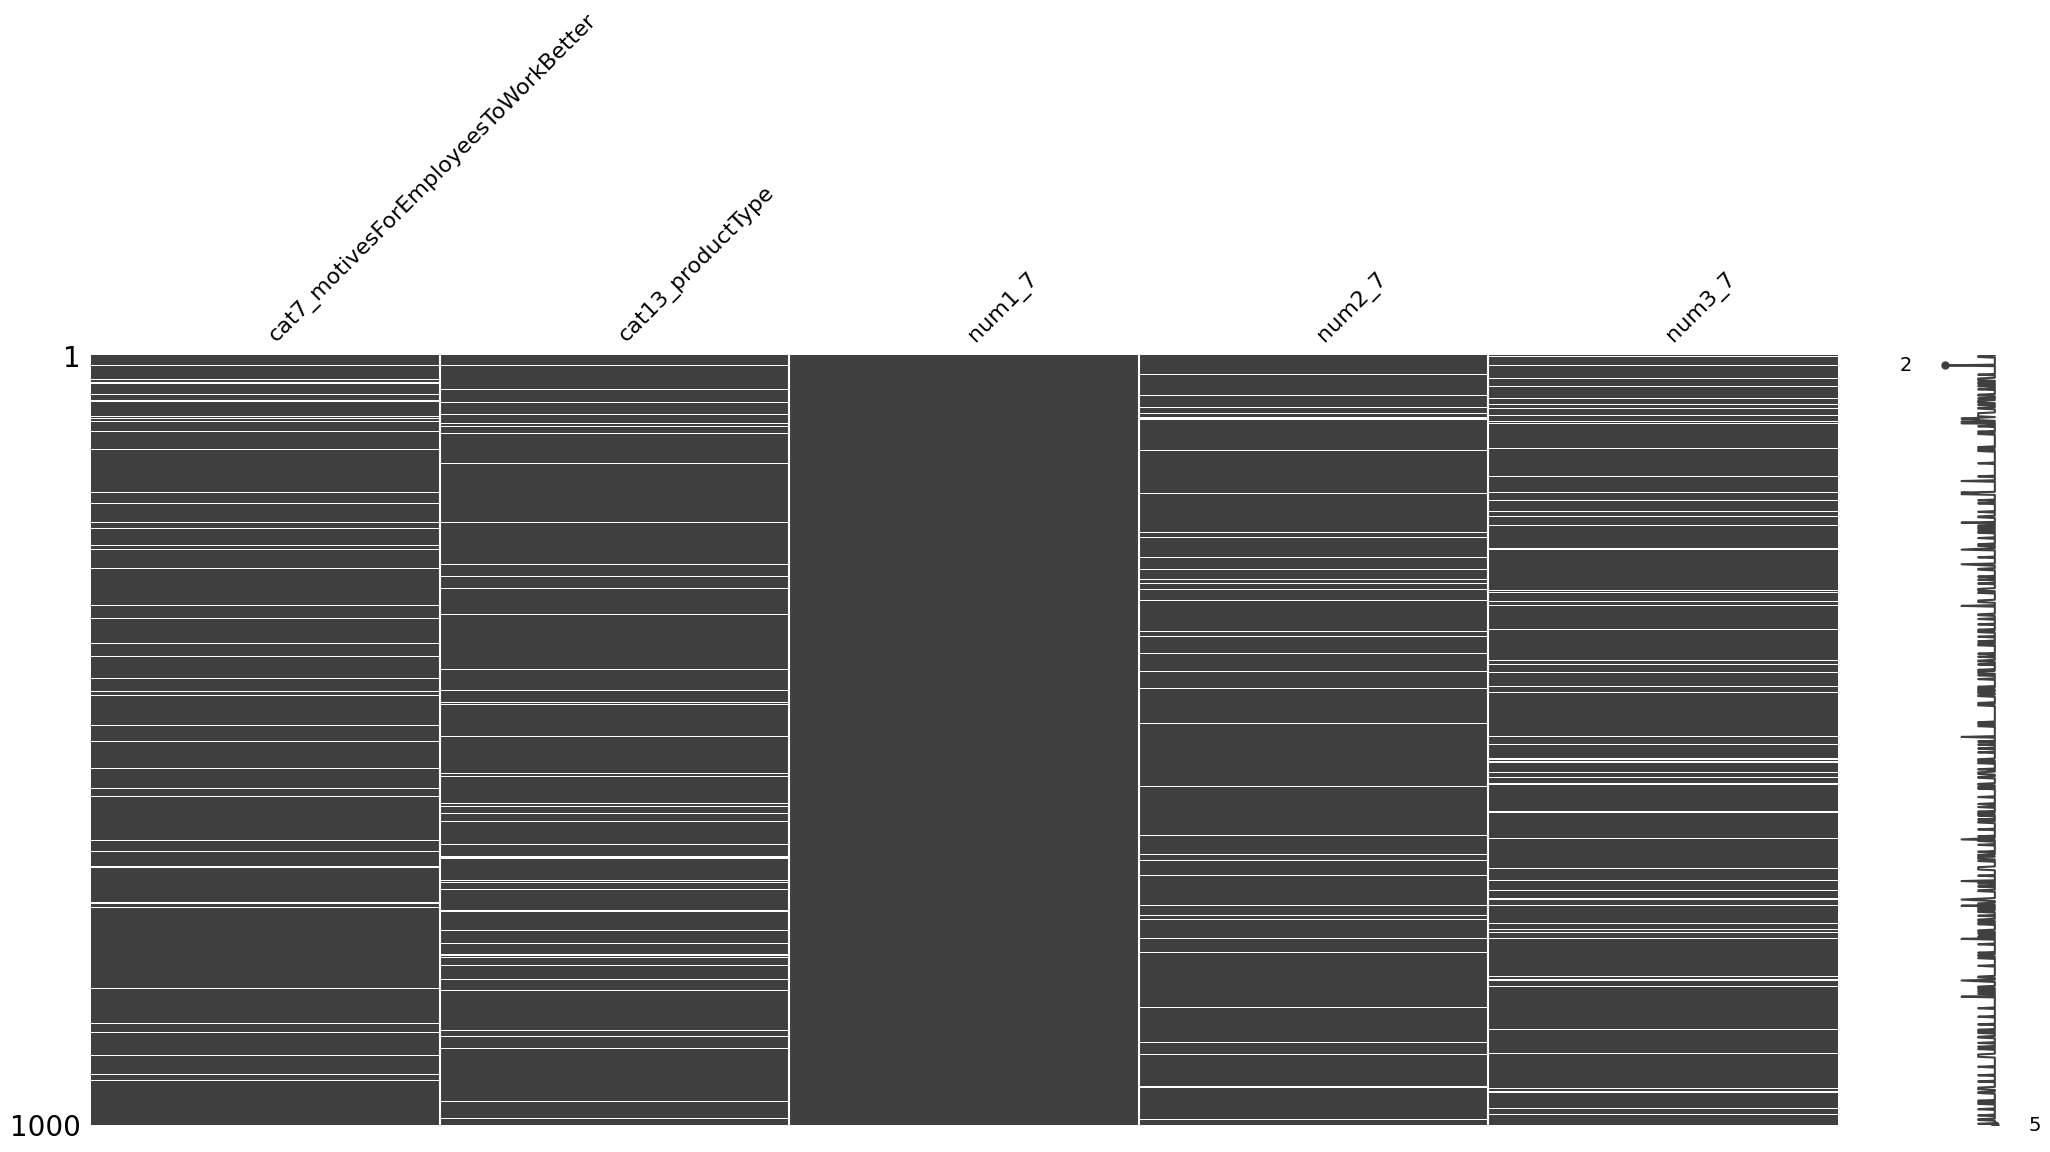

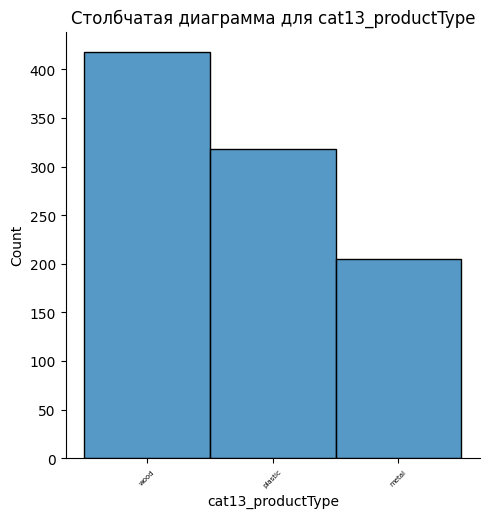

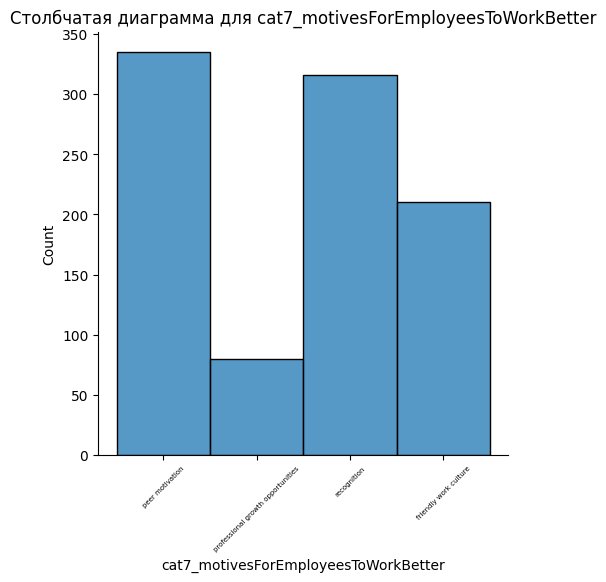

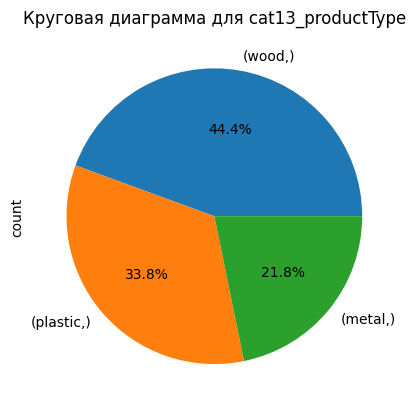

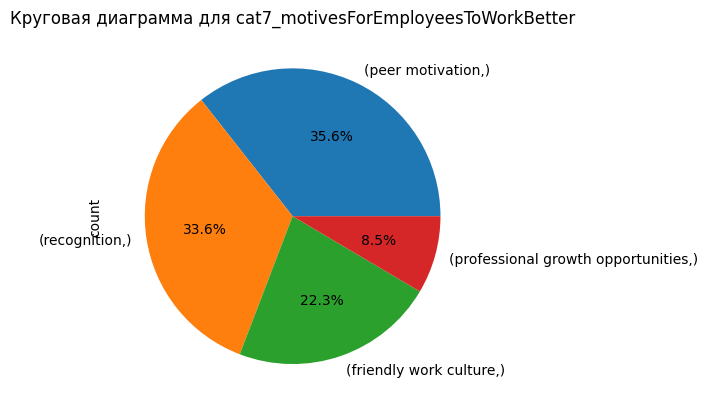

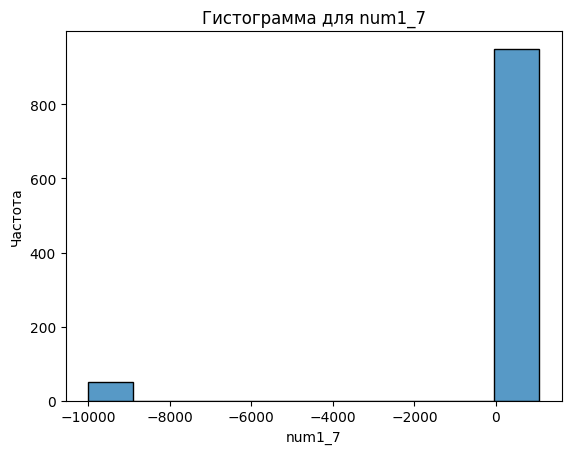

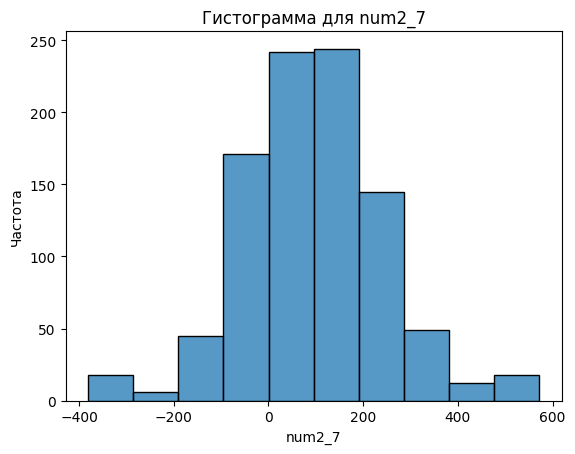

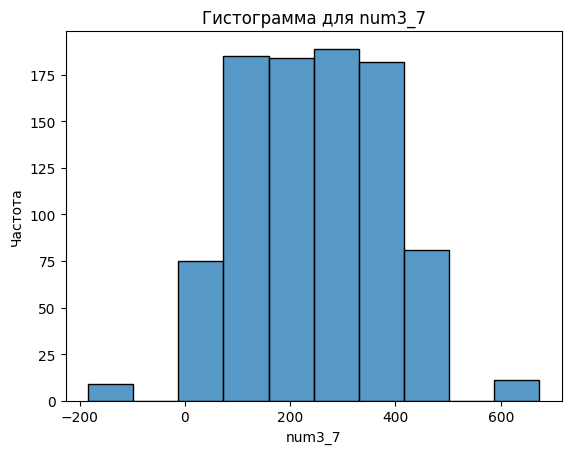

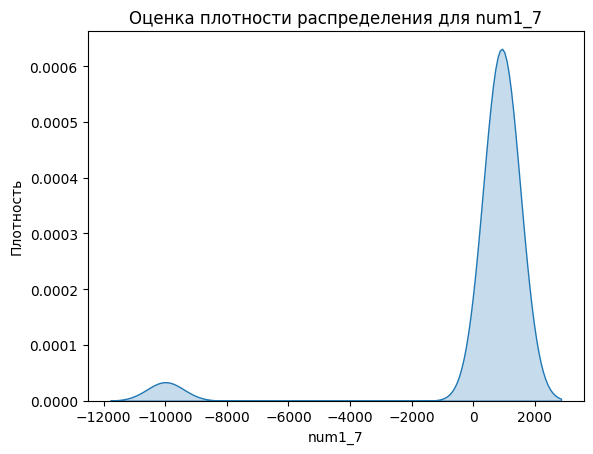

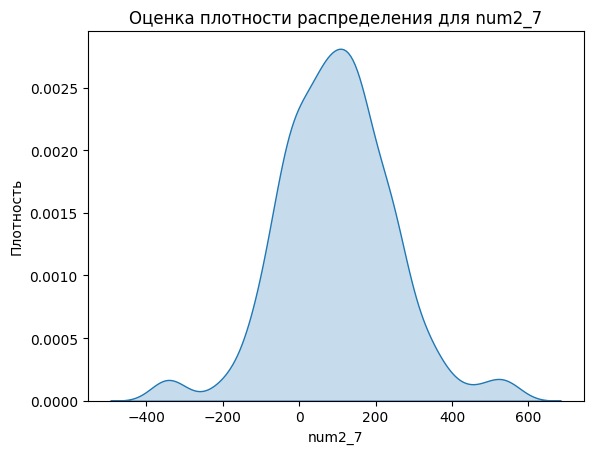

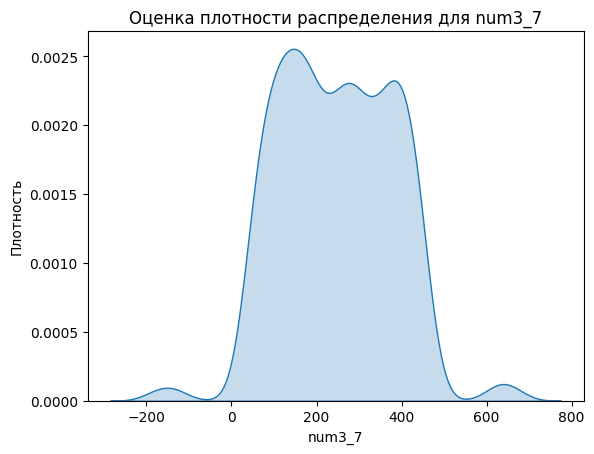

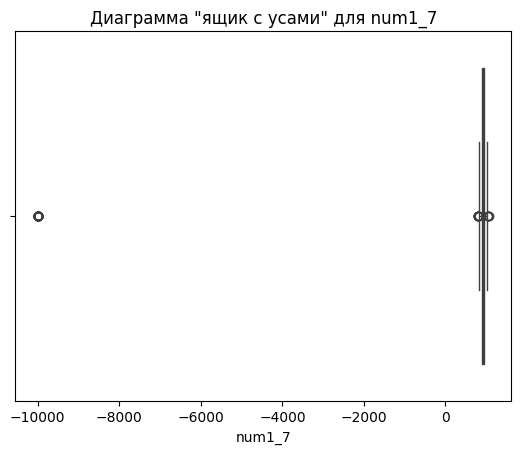

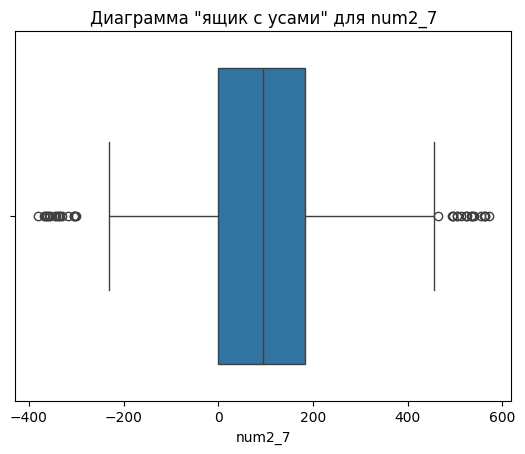

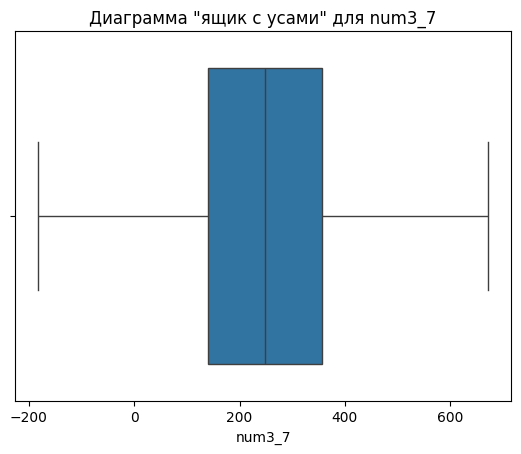

In [141]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –¥–∏–∞–≥—Ä–∞–º–º—ã
missingno.matrix(data3)
calls_all_diagrams(data3)

In [142]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
info_table(data3)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 252. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 25.2

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.

In [143]:
from scipy.stats import sigmaclip
# help(scipy.stats.sigmaclip)
def statistics_for_quantitative_columns(data3):
    statistics = {}
    
    # –í—ã–≤–µ–¥–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    for i in quantitative_columns:
        print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ {i}:")
        stat = data3[i].describe()
        statistics[i] = stat
        print(stat)
        print()
        
statistics_for_quantitative_columns(data3)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num1_7:
count    1000.000000
mean      382.906888
std      2383.294435
min     -9999.000000
25%       898.061108
50%       928.078279
75%       954.652252
max      1059.758094
Name: num1_7, dtype: float64

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num2_7:
count    950.000000
mean      97.236275
std      148.872848
min     -380.846250
25%       -1.129423
50%       93.749787
75%      183.519924
max      571.657153
Name: num2_7, dtype: float64

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num3_7:
count    916.000000
mean     246.529441
std      133.006874
min     -183.570496
25%      140.210945
50%      248.097343
75%      356.878351
max      672.927485
Name: num3_7, dtype: float64



–ù–∞–π–¥–µ–º —Å—Ç—Ä–æ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –≤—ã–±—Ä–æ—Å—ã –≤ —Å–≤–æ–µ–π –∫–æ–ª–æ–Ω–∫–µ c –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ sigmaclip. –ü—Ä–µ–¥–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –±—É–¥–µ–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å –ø–æ 25% –∏ 75%

In [144]:
# –£–î–ê–õ–ò–¢–¨ –ü–û–¢–û–ú –≠–¢–û–¢ –ë–õ–û–ö

# for name in quantitative_columns:
#     lower = statistics[name]['25%']/statistics[name]['std']
#     upper = statistics[name]['75%']/statistics[name]['std']
#     print(lower)s
#     print(upper)

#     low = statistics[name]['mean'] - lower * statistics[name]['std']
#     up = statistics[name]['mean'] + upper * statistics[name]['std']
#     print(low)
#     print(up)

# # for name in quantitative_columns:
# #     # mas = sigmaclip(data2[name], low=statistics[name]['25%']/statistics[name]['std'], high=statistics[name]['75%']/statistics[name]['std'])
# #     mas = sigmaclip(data2[[name]], low=3, high=3)

# for name in quantitative_columns:
#     std_dev = data2[name].std()
#     q25 = data2[name].quantile(0.25)
#     q75 = data2[name].quantile(0.75)
#     low = q25 / std_dev
#     high = q75 / std_dev
#     mas = sigmaclip(data2[name], low=low, high=high)
#     values_of_sigmaclip[name] = mas
    
    # values_of_sigmaclip[name] = mas
# print(values_of_sigmaclip)

In [145]:
values_of_sigmaclip = {}

# –ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ sigmaclip –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —Å–ª–æ–≤–∞—Ä—å
for name in quantitative_columns:
    mas = sigmaclip(data3[name], low=3, high=3)
    values_of_sigmaclip[name] = mas

# –í—ã–≤–µ–¥–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
for i in quantitative_columns:
    print(f"–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ {i}: {values_of_sigmaclip[i].lower}")
    print(f"–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ {i}: {values_of_sigmaclip[i].upper}")
    # print(f"–ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π {i}: {values_of_sigmaclip[i].clipped}")

–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num1_7: 815.330315026143
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num1_7: 1044.1903042583249
–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num2_7: nan
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num2_7: nan
–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num3_7: nan
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num3_7: nan


D:\Python\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Python\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Python\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Python\lib\site-packages\scipy\stats\_stats_py.py:3707: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
D:\Python\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


–ó–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è nan –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ

In [146]:
# –ó–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è nan –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
for col in quantitative_columns:
    mean_of_col = data3[col].mean()
    data3[col] = data3[col].replace(np.nan, mean_of_col)

In [147]:
# –°–Ω–æ–≤–∞ –ø—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ sigmaclip
# –ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ sigmaclip –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —Å–ª–æ–≤–∞—Ä—å
for name in quantitative_columns:
    mas = sigmaclip(data3[name], low=3, high=3)
    values_of_sigmaclip[name] = mas

# –í—ã–≤–µ–¥–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
for i in quantitative_columns:
    print(f"–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ {i}: {values_of_sigmaclip[i].lower}")
    print(f"–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ {i}: {values_of_sigmaclip[i].upper}")
    # print(f"–ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π {i}: {values_of_sigmaclip[i].clipped}")

–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num1_7: 815.330315026143
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num1_7: 1044.1903042583249
–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num2_7: -265.745178466996
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num2_7: 459.59596546844716
–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num3_7: -100.28971454560028
–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ num3_7: 591.821431987697


In [148]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ –º–µ—Ç–æ–¥–æ–º –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ –¥–∏–∞–ø–æ–∑–æ–Ω–∞

# ¬´–í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã¬ª –∑–Ω–∞—á–µ–Ω–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö
# ùëÑ1 ‚àí 1.5 ‚àô ùëÑ3 ‚àí ùëÑ1 , ùëÑ3 + 1.5 ‚àô ùëÑ3 ‚àí ùëÑ1 = [67.75, 73.75]
# ‚ñ™ ¬´–í–Ω–µ—à–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã¬ª –¥–∞–Ω–Ω—ã—Ö
# ùëÑ1 ‚àí 3 ‚àô ùëÑ3 ‚àí ùëÑ1 , ùëÑ3 + 3 ‚àô ùëÑ3 ‚àí ùëÑ1 = [65.5, 76]
# –ó–Ω–∞—á–µ–Ω–∏–µ, –ª–µ–∂–∞—â–µ–µ –≤–Ω–µ ¬´–≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö –≥—Ä–∞–Ω–∏—Ü¬ª, –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç—Å—è –∫–∞–∫ ¬´–Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π
# –≤—ã–±—Ä–æ—Å¬ª, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏–µ, –Ω–∞—Ö–æ–¥—è—â–µ–µ—Å—è –∑–∞ ¬´–≤–Ω–µ—à–Ω–∏–º–∏ –≥—Ä–∞–Ω–∏—Ü–∞–º–∏¬ª,
# –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç—Å—è –∫–∞–∫ ¬´–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –≤—ã–±—Ä–æ—Å¬ª.

def find_blowout(columns, data):
    values_of_iqr = {}
    for col in columns:
        q25 = data[col].quantile(0.25)
        q75 = data[col].quantile(0.75)
        iqr = q75 - q25
        low = q25 - 1.5 * iqr
        up = q75 + 1.5 * iqr
        values_of_iqr[col] = [low, up]
    return values_of_iqr

print(find_blowout(quantitative_columns, data3))

{'num1_7': [813.1743934542853, 1039.5389668716018], 'num2_7': [-258.25790662628117, 439.1350969100278], 'num3_7': [-151.5932567411561, 646.2105663641241]}


In [149]:
values_of_sigmaclip

{'num1_7': SigmaclipResult(clipped=array([ 928.00326432,  942.68361657,  986.82799201,  940.82464543,
         908.79423589,  872.60936026,  923.56796895,  939.35797863,
         905.22897964,  909.77400267,  878.11561391,  864.35960511,
         960.59936495,  991.19473994,  942.82962904,  945.37479411,
         907.32513174, 1015.93627103,  918.69265883,  939.59862566,
         944.07047899,  915.75152317,  948.06914132,  945.22396316,
         876.06371356,  834.83101472,  965.83016743,  946.63904036,
         902.22443196,  965.80142417,  897.38184353, 1005.94023246,
         919.32415636, 1017.03456248,  844.35380818,  926.50218199,
         900.57300155, 1006.28823146,  989.78421134,  961.258195  ,
         885.07069905,  946.93649565,  894.36517462,  882.35262053,
         938.02245408,  978.31783121,  951.65814897,  937.19920778,
         971.60022089,  910.12282704,  933.52502233,  986.22826176,
         835.48718452,  963.91228749,  928.15329315,  906.14905719,
         950.5

In [150]:
# –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≤—Ö–æ–¥—è—Ç –≤ –¥–∏–∞–ø–æ–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π sigmaclip

data4 = data3.copy() 

for name in quantitative_columns:
    data3 = data3[data3[name].isin(values_of_sigmaclip[name].clipped)]
    
print(data3)

    cat7_motivesForEmployeesToWorkBetter cat13_productType      num1_7  \
0                        peer motivation              wood  928.003264   
1      professional growth opportunities           plastic  942.683617   
2                        peer motivation               NaN  986.827992   
3                            recognition           plastic  940.824645   
4                            recognition             metal  908.794236   
..                                   ...               ...         ...   
995                      peer motivation              wood  935.758683   
996                      peer motivation              wood  924.223222   
997                friendly work culture             metal  903.939907   
998                          recognition              wood  874.669893   
999                friendly work culture              wood  922.671336   

         num2_7      num3_7  
0    230.711895   63.103060  
1    -54.555626  246.529441  
2    159.587517  100.

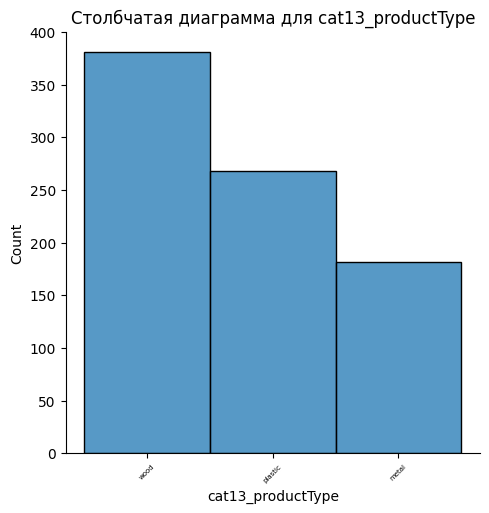

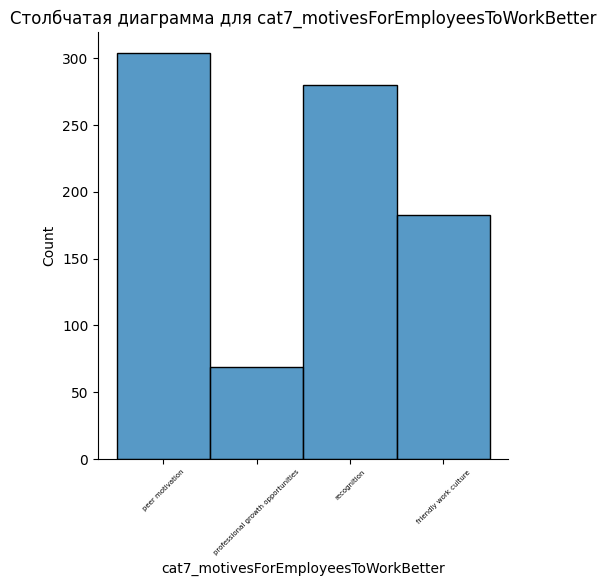

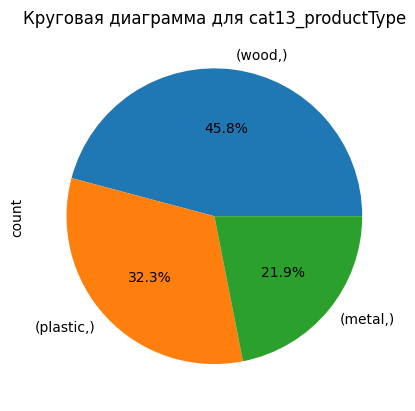

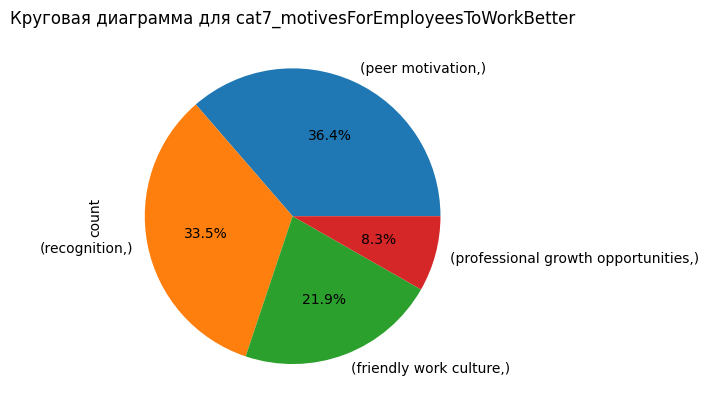

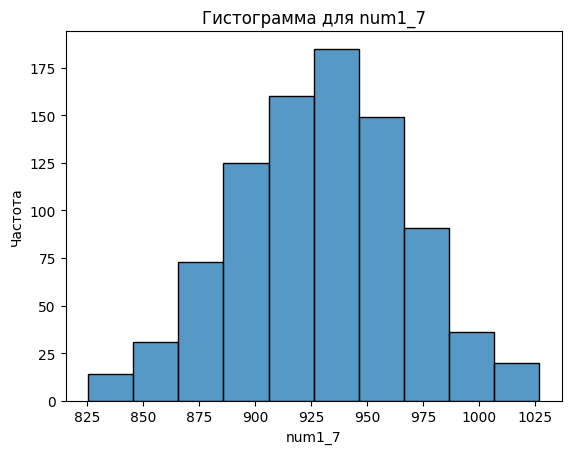

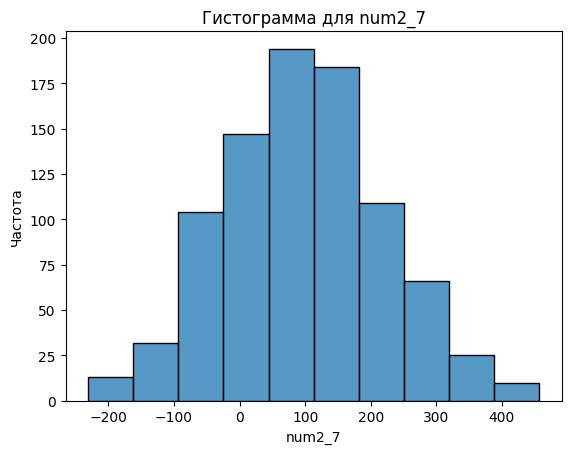

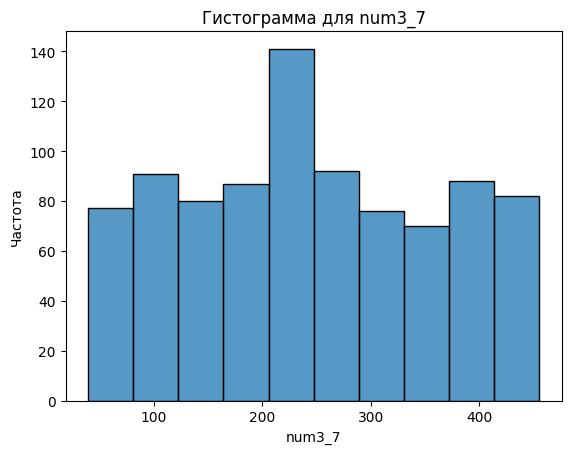

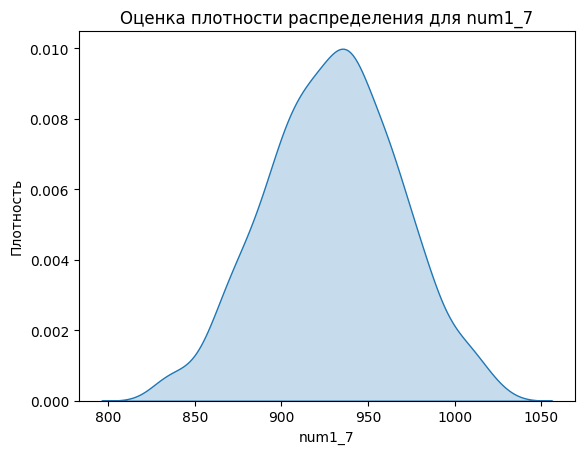

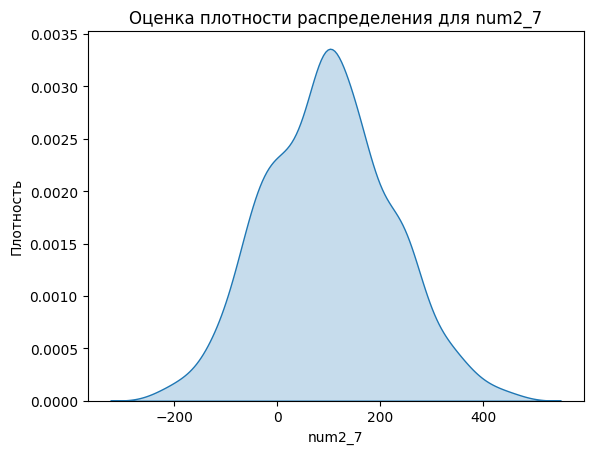

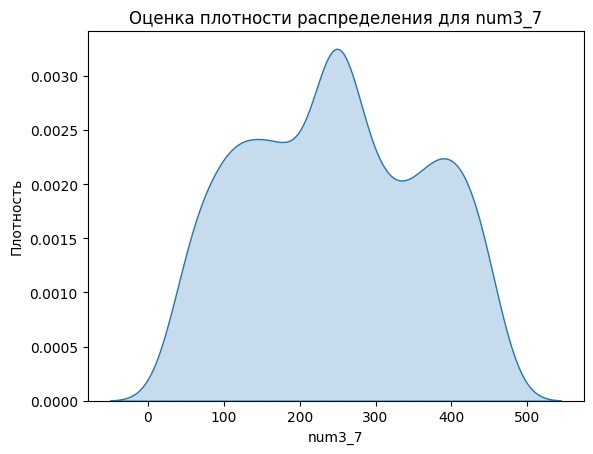

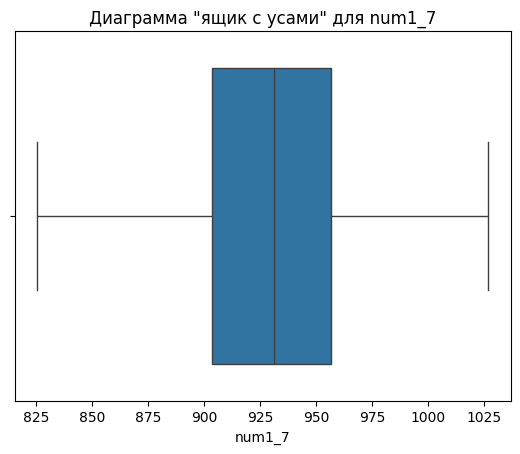

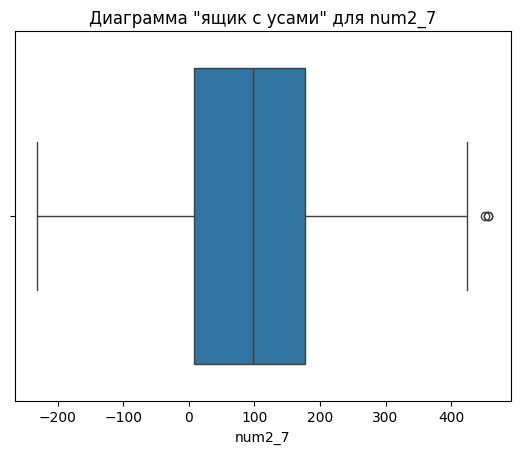

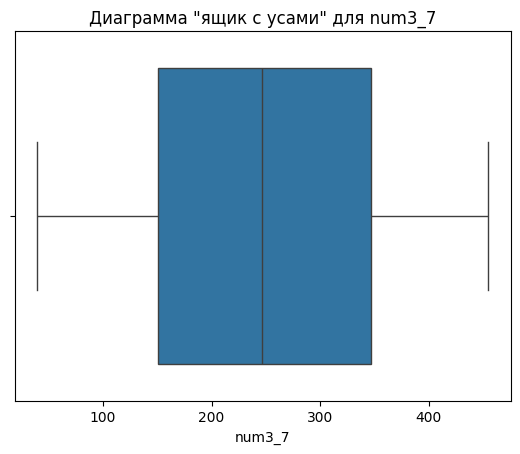

In [151]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∏–∞–≥—Ä–∞–º–º—ã
calls_all_diagrams(data3)

In [152]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
statistics_for_quantitative_columns(data3)

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num1_7:
count     884.000000
mean      929.686556
std        38.299888
min       825.602082
25%       903.486712
50%       931.052671
75%       956.604971
max      1026.847657
Name: num1_7, dtype: float64

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num2_7:
count    884.000000
mean      98.805513
std      122.062232
min     -230.855493
25%        7.779496
50%       97.236275
75%      176.635569
max      456.682114
Name: num2_7, dtype: float64

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ num3_7:
count    884.000000
mean     246.939450
std      115.670177
min       39.635329
25%      150.819002
50%      246.529441
75%      347.034133
max      454.957401
Name: num3_7, dtype: float64



In [153]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
info_table(data3)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (884, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 101. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 11.425339366515837

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è:

## –ó–∞–¥–∞–Ω–∏–µ 4. –ü–æ–∏—Å–∫ –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–ü—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–∏—Å–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. 
–í—ã–≤–µ—Å—Ç–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –ø—Ä–æ–ø—É—Å–∫–∞–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ 
–í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏ . –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–ª—è –ø–µ—Ä–≤–æ –æ
–ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Çk ÔøΩ-
–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π, –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–º–µ –∏—Ç—å
—Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—Ä –¥–Ω–µ–µ
–∑–Ω–∞—á–µ–Ω–∏–µ, –¥–ª—è —á–µ—Ç–≤–µ—Ä—Ç–æ–≥–æ ‚Äì –º–µ–¥–∏–∞–Ω—É, –¥–ª—è –ø—è—Ç–æ–≥–æ ‚Äì –ºk–æ ¬´ùëò-
–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π¬ª. –î–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º ¬´k–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π¬ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω—É –∏–∑ –≥–æ—Ç–æ–≤—ã—Ö —Ä–µ–∞ –∏–∑–∞—Ü–∏–π
sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn).

In [154]:
info_table(data4)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 118. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 11.799999999999999

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è

–í—ã–ø–æ–ª–Ω–∏–º –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ø–µ—Ä–≤–æ–º —Å—Ç–æ–ª–±—Ü–µ –º–µ—Ç–æ–¥–æ–º k-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π

In [155]:
# –°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –≤–∏–¥–µ —á–∏—Å–µ–ª (–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç)
def perform_change(ar):
    uniq_val = ar.unique()
    decoder = {}
    count = 1
    for i in uniq_val:
        if pd.isna(i):
            decoder[count] = i
            count += 1
            continue
        ar.replace(i, count, inplace=True)
        decoder[count] = i
        count += 1
    return decoder

def perform_decoder(ar, decoder):
    for key, value in decoder.items():
        ar.replace(key, value, inplace=True)

–î–ª—è data4

In [156]:
# –í—ã–ø–æ–ª–Ω–∏–º –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ø–µ—Ä–≤–æ–º —Å—Ç–æ–ª–±—Ü–µ –º–µ—Ç–æ–¥–æ–º k-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
knnimpute_data = data4.copy()

In [157]:
info_table(knnimpute_data)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 118. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 11.799999999999999

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è

In [158]:


# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—ã–π
decoder_for_data4_1 = perform_change(knnimpute_data['cat7_motivesForEmployeesToWorkBetter'])
decoder_for_data4_2 = perform_change(knnimpute_data['cat13_productType'])

In [159]:
info_table(knnimpute_data)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 118. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 11.799999999999999

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è

In [160]:
knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

In [161]:
knnimpute_data = scaler.fit_transform(knnimpute_data) # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º

In [162]:
knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # –∑–∞–ø–æ–ª–Ω—è–µ–º

In [163]:
knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

In [164]:
knnimpute_data = pd.DataFrame(knnimpute_data)
knnimpute_data = knnimpute_data[0].astype(int).astype(float)
perform_decoder(knnimpute_data, decoder_for_data4_1)

In [165]:
# –ü—Ä–∏–º–µ–Ω–∏–º –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∫ —Å—Ç–æ–ª–±
data4['cat7_motivesForEmployeesToWorkBetter'] = knnimpute_data.values
info_table(data4)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 59. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 5.8999999999999995

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è:

–î–ª—è data3

In [166]:
knnimpute_data = data3.copy()

# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—ã–π
decoder_for_data3_1 = perform_change(knnimpute_data['cat7_motivesForEmployeesToWorkBetter'])
decoder_for_data4_2 = perform_change(knnimpute_data['cat13_productType'])

knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

knnimpute_data = scaler.fit_transform(knnimpute_data) # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º

knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # –∑–∞–ø–æ–ª–Ω—è–µ–º

knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

knnimpute_data = pd.DataFrame(knnimpute_data)
knnimpute_data = knnimpute_data[0].astype(int).astype(float)
perform_decoder(knnimpute_data, decoder_for_data3_1)

# –ü—Ä–∏–º–µ–Ω–∏–º –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∫ —Å—Ç–æ–ª–±
data3['cat7_motivesForEmployeesToWorkBetter'] = knnimpute_data.values
# —Ç.–∫. –∏–Ω–¥–µ–∫—Å—ã –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç
info_table(data3)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (884, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 53. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 5.995475113122172

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0

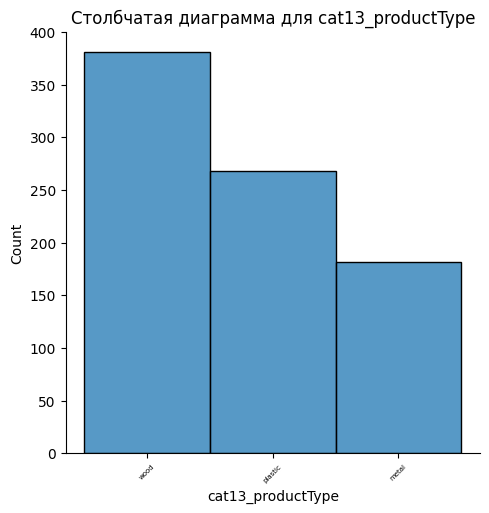

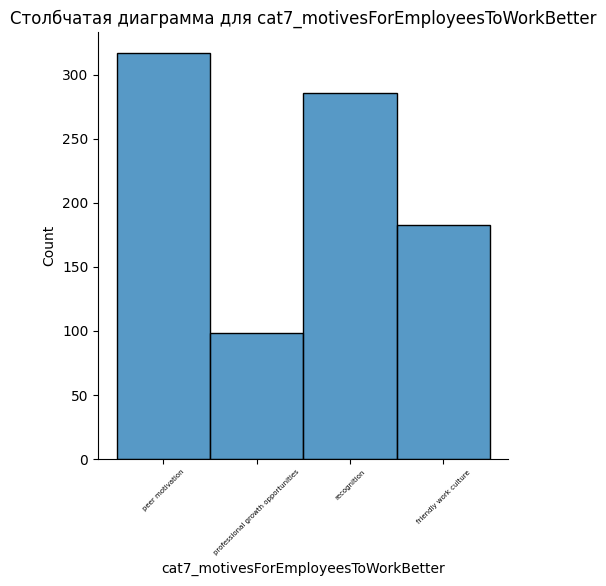

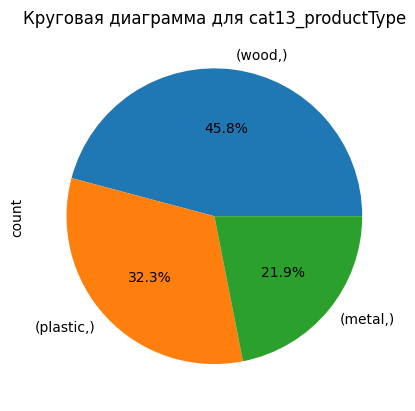

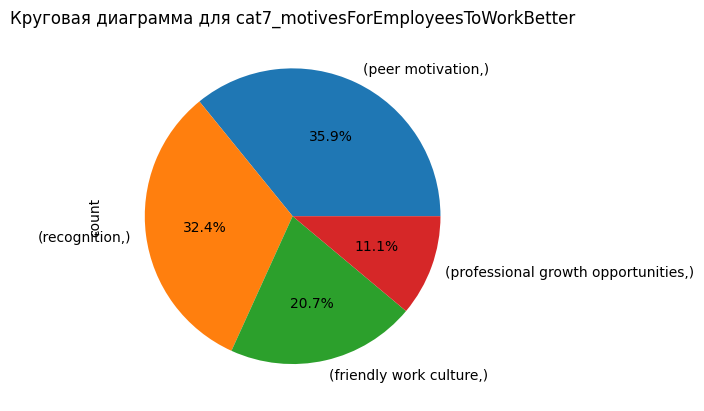

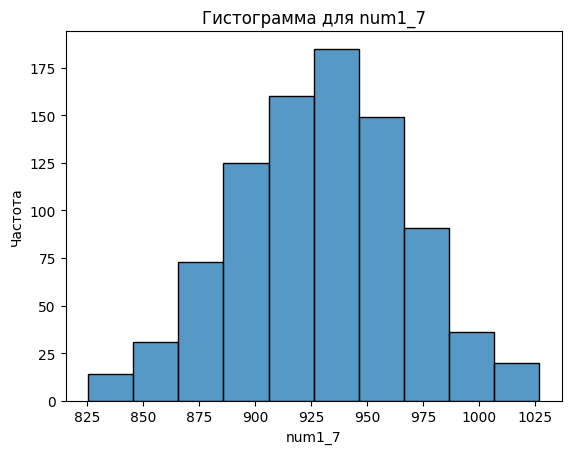

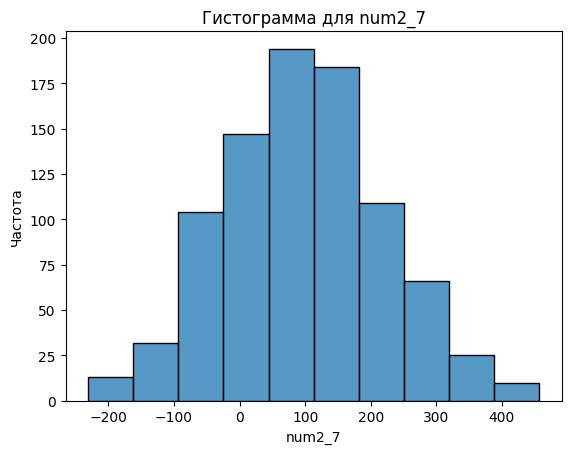

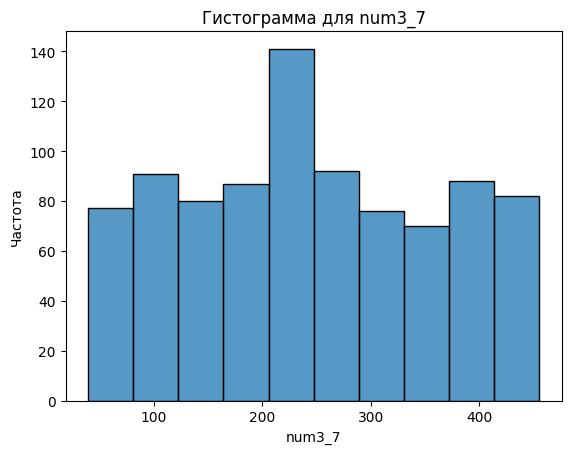

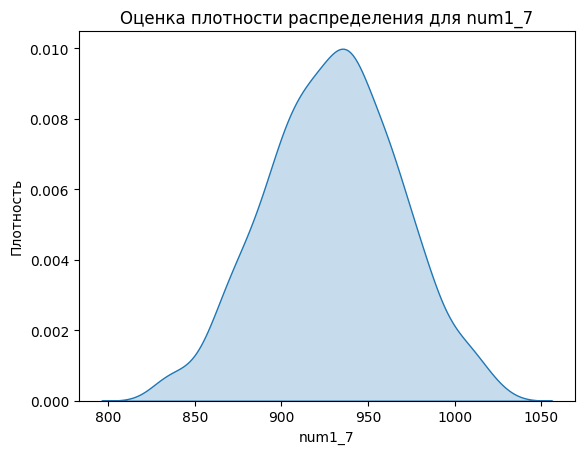

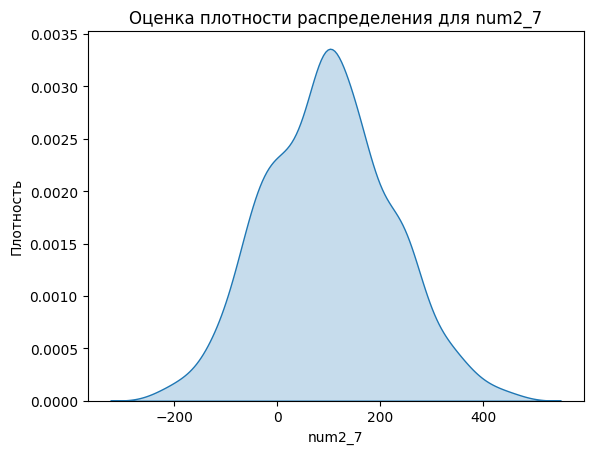

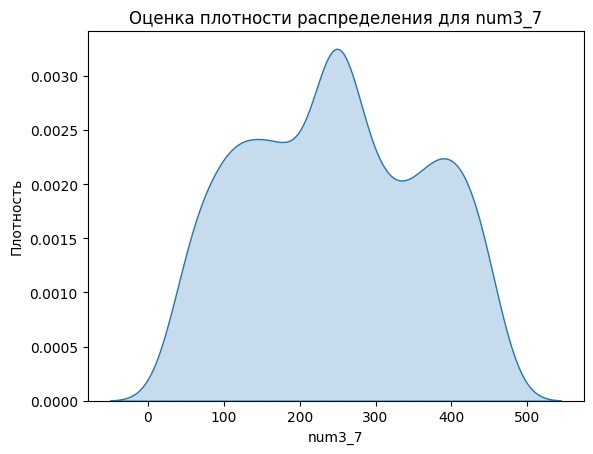

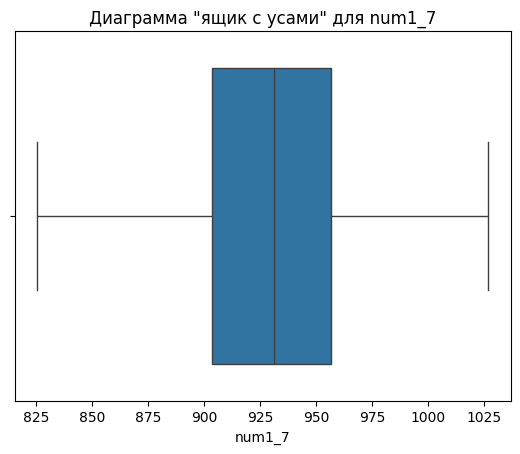

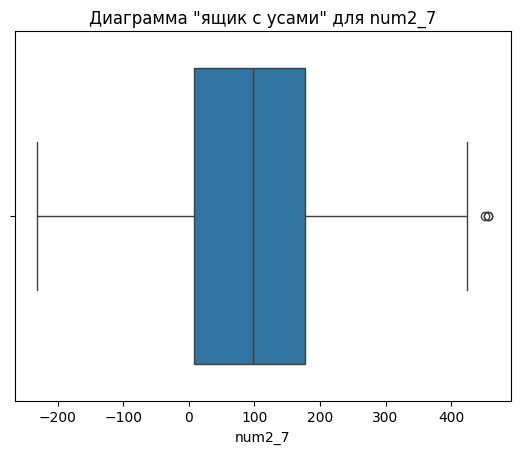

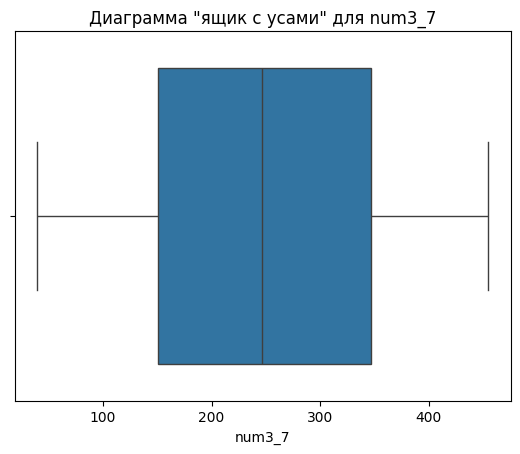

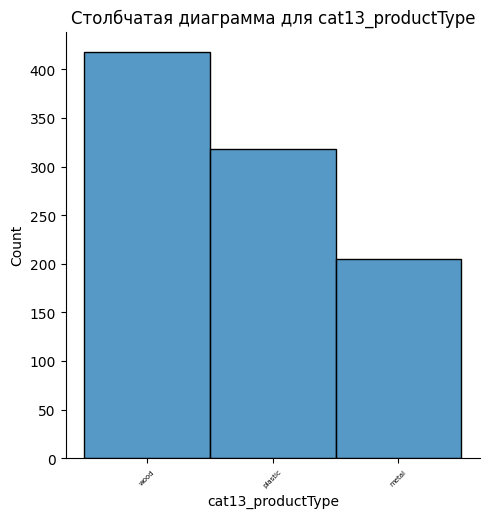

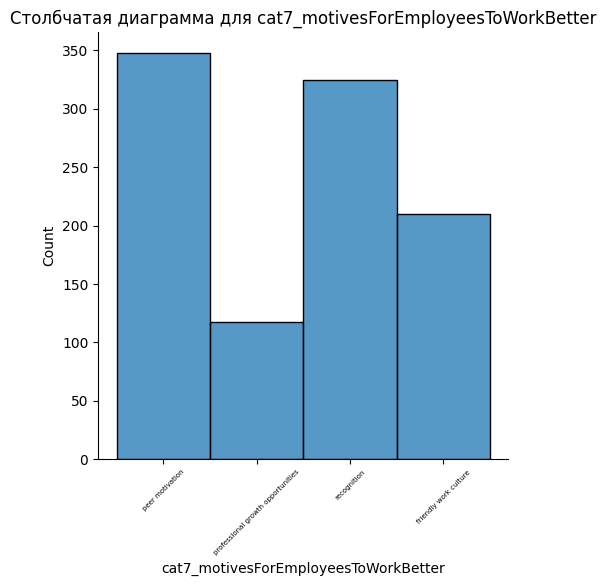

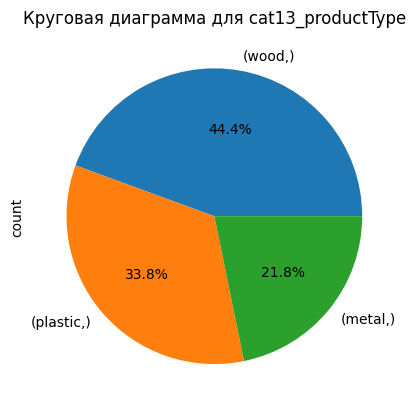

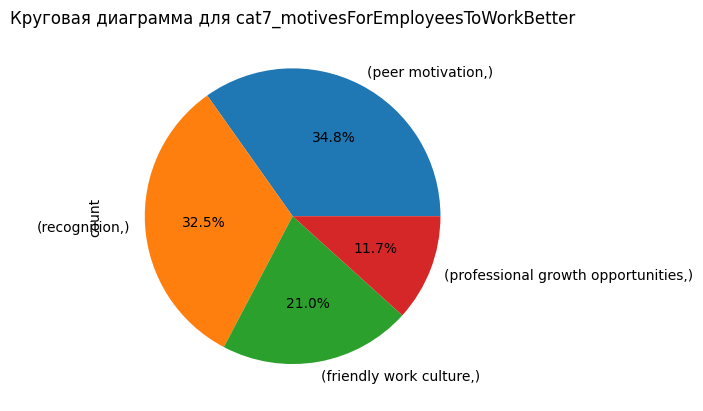

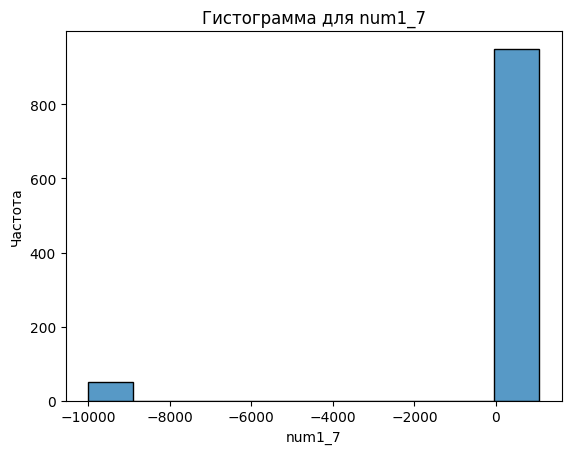

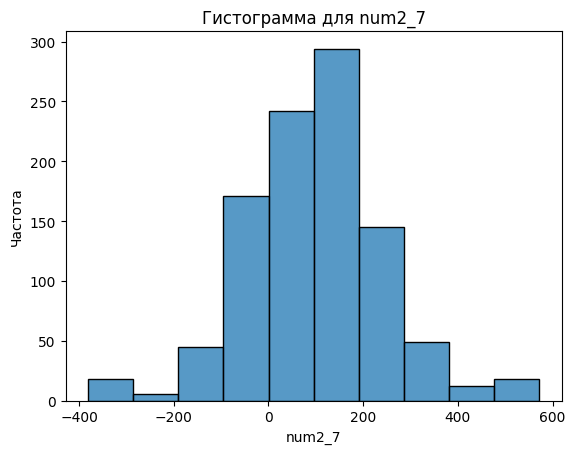

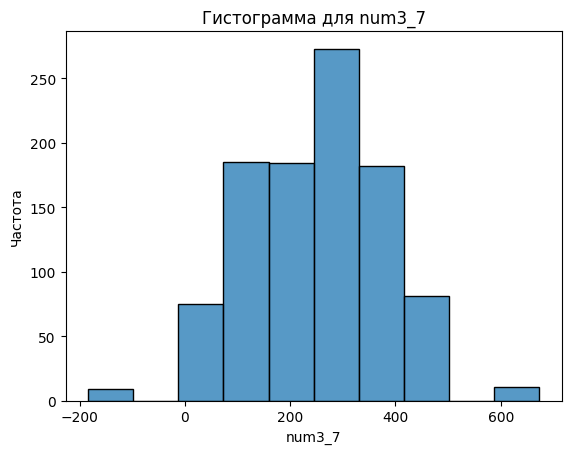

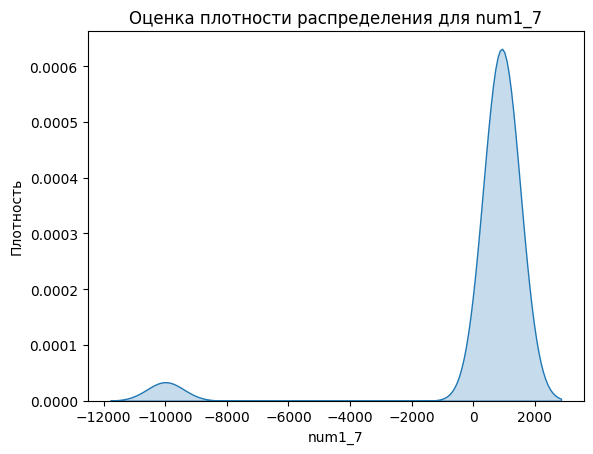

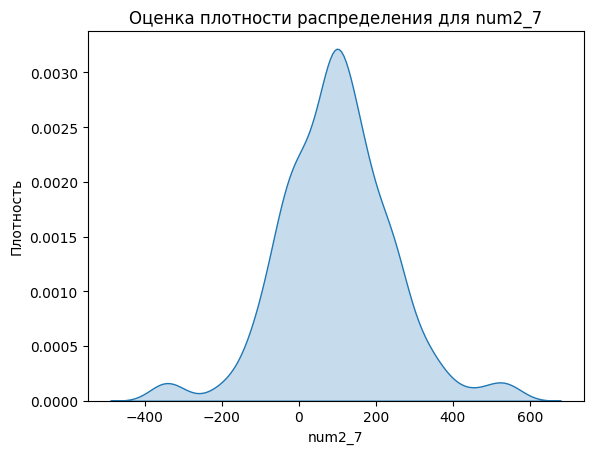

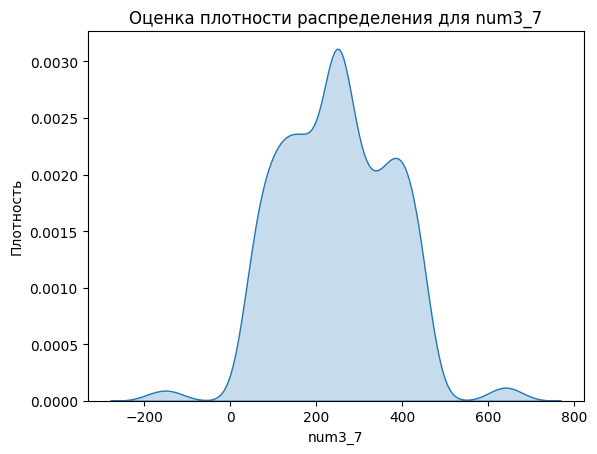

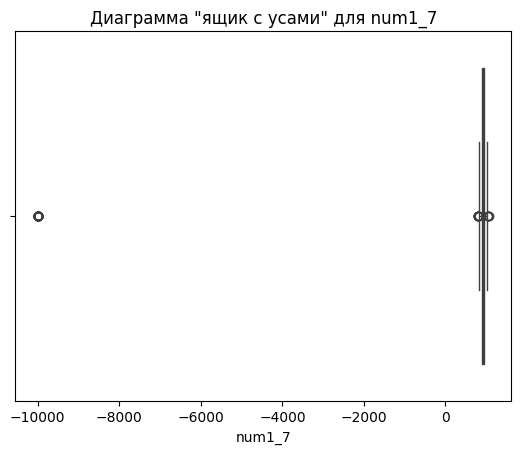

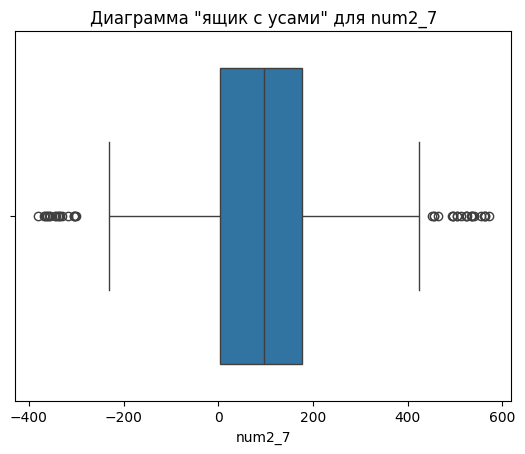

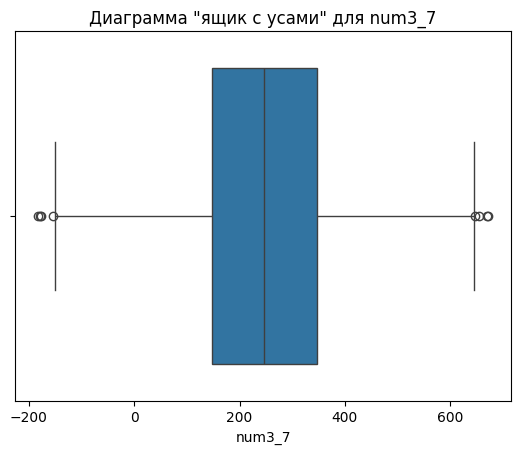

In [167]:
calls_all_diagrams(data3)
calls_all_diagrams(data4)

In [168]:
# –ó–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤–æ –≤—Ç–æ—Ä–æ–º —Å—Ç–æ–ª–±—Ü–µ —Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º 
data4['cat13_productType'] = data4['cat13_productType'].fillna(data4['cat13_productType'].mode()[0])
info_table(data4)

data3['cat13_productType'] = data3['cat13_productType'].fillna(data3['cat13_productType'].mode()[0])
info_table(data3)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 0. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 0.0

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% 

In [169]:
# –ó–∞–ø–æ–ª–Ω–∏–º –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —á–µ—Ç–≤–µ—Ä—Ç–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ –º–µ–¥–∏–∞–Ω–æ–π
data4['num2_7'] = data4['num2_7'].fillna(data4['num2_7'].median())
info_table(data4)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 0. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 0.0

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% 

In [170]:
knnimpute_data = data4.copy()

# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—ã–π
decoder_for_data3_1 = perform_change(knnimpute_data['cat7_motivesForEmployeesToWorkBetter'])
decoder_for_data4_2 = perform_change(knnimpute_data['cat13_productType'])

knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

knnimpute_data = scaler.fit_transform(knnimpute_data) # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º

knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # –∑–∞–ø–æ–ª–Ω—è–µ–º

knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

knnimpute_data = pd.DataFrame(knnimpute_data)

data4['num3_7'] = knnimpute_data[4].values

info_table(data4)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (1000, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 0. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 0.0

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% 

In [171]:
info_table(data3)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤: (884, 5).

–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã: ['cat7_motivesForEmployeesToWorkBetter', 'cat13_productType', 'num1_7', 'num2_7', 'num3_7'].

–î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã:

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ö–æ—Ç—å –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ nan: 0. –ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 0.0

–ó–Ω–∞—á–µ–Ω–∏–µ '-' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ ' ' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-1' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '-9' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ '0' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞
–ó–Ω–∞—á–µ–Ω–∏–µ 'nan' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è: 0 —Ä–∞–∑. 0.0% –

## –ó–∞–¥–∞–Ω–∏–µ 5. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö.
–ü—Ä–∏–≤–µ—Å—Ç–∏ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º—É –≤–∏–¥—É. –î–ª—è 
–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∏—Ö –∫–æ–¥–∏—Ä–æ–≤–∫—É. –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ 
–¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤—ã–ø–æ–ª–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∏
–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é, –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö ‚Äì one-hot encod ng
(–¥–ª—è –ø–µ—Ä–≤–æ–≥–æ) –∏ label encoding (–¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ). –î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤ –Ω–∏—è
–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é sklearn.preprocesing.

In [172]:
data5 = data3.copy()
data5_4 = data3.copy()

–í—ã–ø–æ–ª–Ω–∏–º –∫–æ–¥–∏—Ä–æ–≤–∫—É –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ —Å –ø–æ–º–æ—â—å—é one-hot encoding

In [173]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_data = ohe.fit_transform(data5[['cat7_motivesForEmployeesToWorkBetter']])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(['cat7_motivesForEmployeesToWorkBetter']))

data5.reset_index(drop=True, inplace=True)

data5 = pd.concat([data5, encoded_df], axis=1)

data5.drop(['cat7_motivesForEmployeesToWorkBetter'], axis=1, inplace=True)


In [174]:
data5

cat13_productType      num1_7      num2_7      num3_7  \
0                wood  928.003264  230.711895   63.103060   
1             plastic  942.683617  -54.555626  246.529441   
2                wood  986.827992  159.587517  100.871834   
3             plastic  940.824645  451.728967  174.606950   
4               metal  908.794236  186.329695  425.314903   
..                ...         ...         ...         ...   
879              wood  935.758683  -59.478491  205.060280   
880              wood  924.223222  112.173751  105.832769   
881             metal  903.939907  151.651724  246.529441   
882              wood  874.669893  256.342389  123.257186   
883              wood  922.671336  -35.134592  443.382445   

     cat7_motivesForEmployeesToWorkBetter_friendly work culture  \
0                                                  0.0            
1                                                  0.0            
2                                                  0.0            
3                                                  0.0            
4                                                  0.0            
..                                                 ...            
879                                                0.0            
880                                                0.0            
881                                                1.0            
882                                                0.0            
883                                                1.0            

     cat7_motivesForEmployeesToWorkBetter_peer motivation  \
0                                                  1.0      
1                                                  0.0      
2                                                  1.0      
3                                                  0.0      
4                                                  0.0      
..                                                 ...      
879                                                1.0      
880                                                1.0      
881                                                0.0      
882                                                0.0      
883                                                0.0      

     cat7_motivesForEmployeesToWorkBetter_professional growth opportunities  \
0                                                  0.0                        
1                                                  1.0                        
2                                                  0.0                        
3                                                  0.0                        
4                                                  0.0                        
..                                                 ...                        
879                                                0.0                        
880                                                0.0                        
881                                                0.0                        
882                                                0.0                        
883                                                0.0                        

     cat7_motivesForEmployeesToWorkBetter_recognition  
0                                                 0.0  
1                                                 0.0  
2                                                 0.0  
3                                                 1.0  
4                                                 1.0  
..                                                ...  
879                                               0.0  
880                                               0.0  
881                                               0.0  
882                                               1.0  
883                                               0.0  

[884 rows x 8 columns]

–ó–∞–∫–æ–¥–∏—Ä—É–µ–º –≤—Ç–æ—Ä–æ–π —Å—Ç–æ–ª–±–µ—Ü —Å –ø–æ–º–æ—â—å—é LabelEncoding

In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data5['cat13_productType'] = label_encoder.fit_transform(data5['cat13_productType'])

In [176]:
data5

cat13_productType      num1_7      num2_7      num3_7  \
0                    2  928.003264  230.711895   63.103060   
1                    1  942.683617  -54.555626  246.529441   
2                    2  986.827992  159.587517  100.871834   
3                    1  940.824645  451.728967  174.606950   
4                    0  908.794236  186.329695  425.314903   
..                 ...         ...         ...         ...   
879                  2  935.758683  -59.478491  205.060280   
880                  2  924.223222  112.173751  105.832769   
881                  0  903.939907  151.651724  246.529441   
882                  2  874.669893  256.342389  123.257186   
883                  2  922.671336  -35.134592  443.382445   

     cat7_motivesForEmployeesToWorkBetter_friendly work culture  \
0                                                  0.0            
1                                                  0.0            
2                                                  0.0            
3                                                  0.0            
4                                                  0.0            
..                                                 ...            
879                                                0.0            
880                                                0.0            
881                                                1.0            
882                                                0.0            
883                                                1.0            

     cat7_motivesForEmployeesToWorkBetter_peer motivation  \
0                                                  1.0      
1                                                  0.0      
2                                                  1.0      
3                                                  0.0      
4                                                  0.0      
..                                                 ...      
879                                                1.0      
880                                                1.0      
881                                                0.0      
882                                                0.0      
883                                                0.0      

     cat7_motivesForEmployeesToWorkBetter_professional growth opportunities  \
0                                                  0.0                        
1                                                  1.0                        
2                                                  0.0                        
3                                                  0.0                        
4                                                  0.0                        
..                                                 ...                        
879                                                0.0                        
880                                                0.0                        
881                                                0.0                        
882                                                0.0                        
883                                                0.0                        

     cat7_motivesForEmployeesToWorkBetter_recognition  
0                                                 0.0  
1                                                 0.0  
2                                                 0.0  
3                                                 1.0  
4                                                 1.0  
..                                                ...  
879                                               0.0  
880                                               0.0  
881                                               0.0  
882                                               1.0  
883                                               0.0  

[884 rows x 8 columns]

In [177]:
def diagnostic_plots(values):
    plt.figure(figsize=(15,6))
    # –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
    plt.subplot(1, 2, 1)
    values.hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(values, dist="norm", plot=plt)
    plt.show()

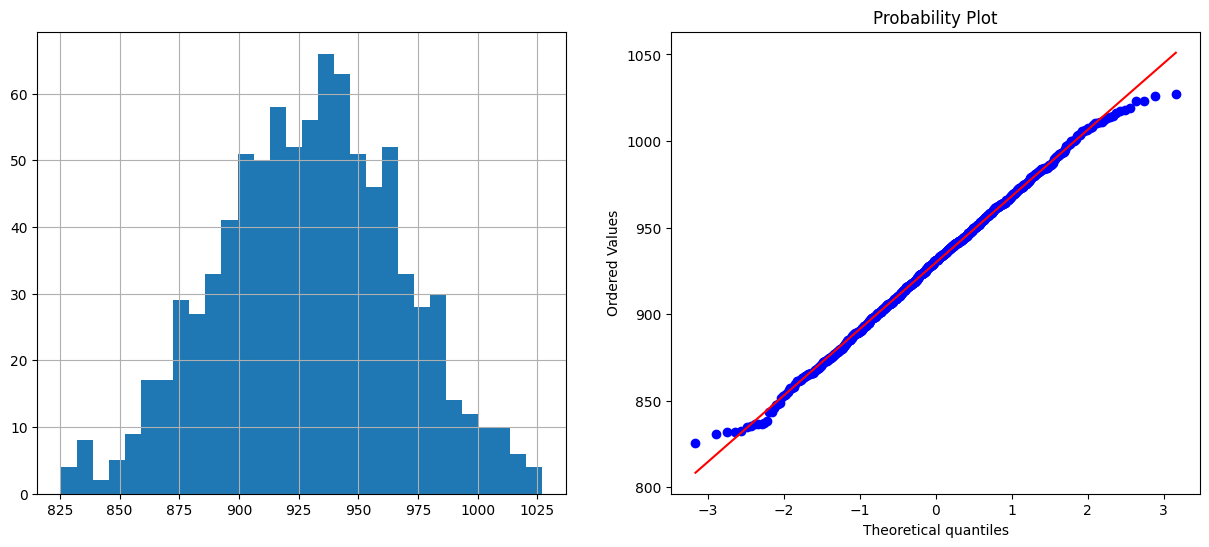

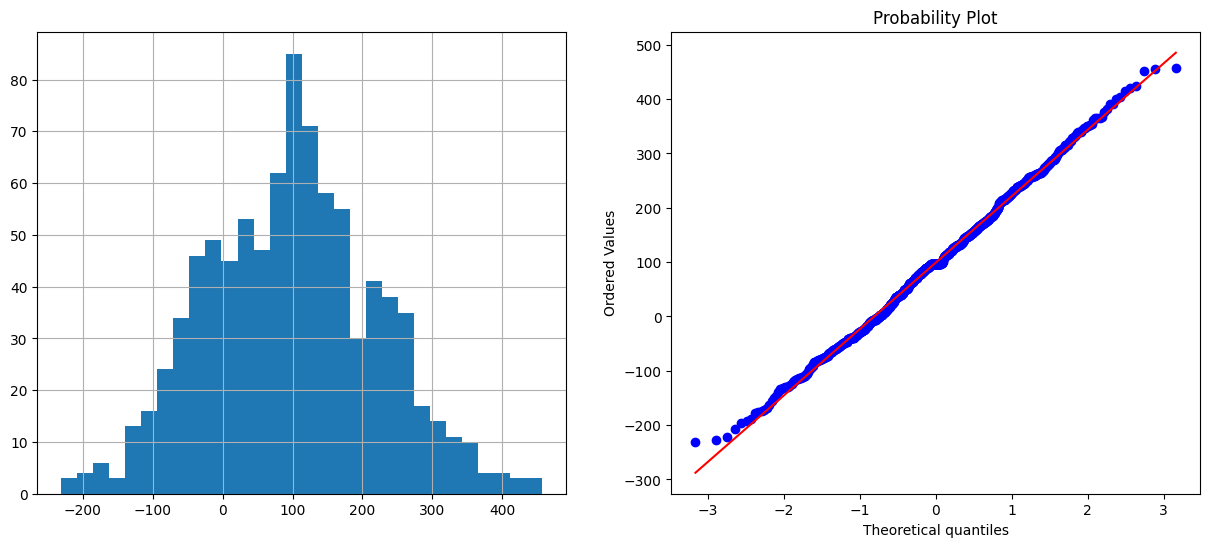

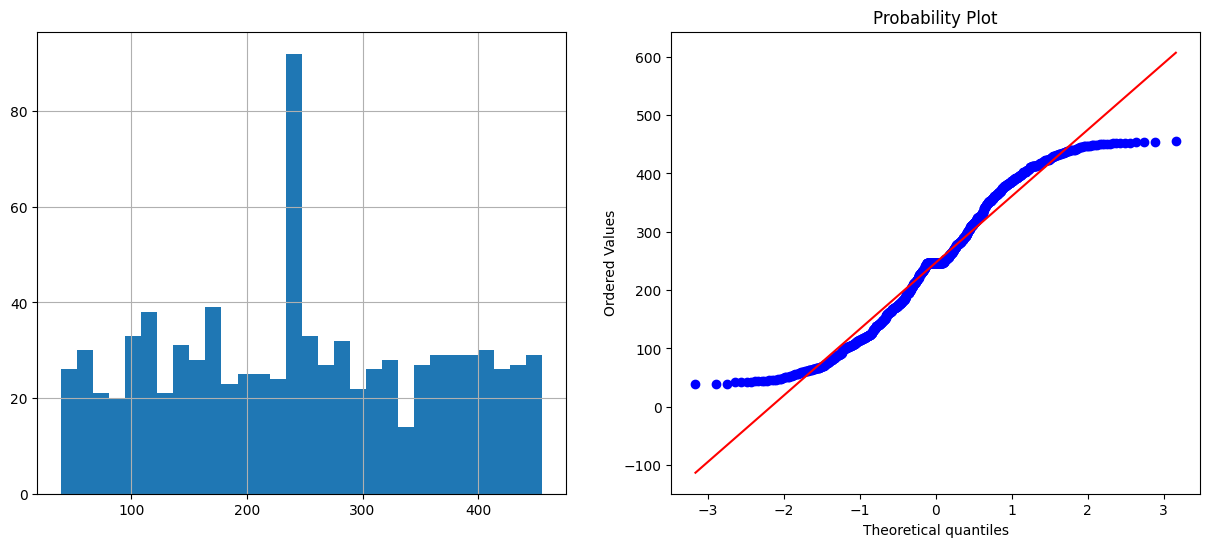

In [178]:
diagnostic_plots(data5['num1_7'])
diagnostic_plots(data5['num2_7'])
diagnostic_plots(data5['num3_7'])

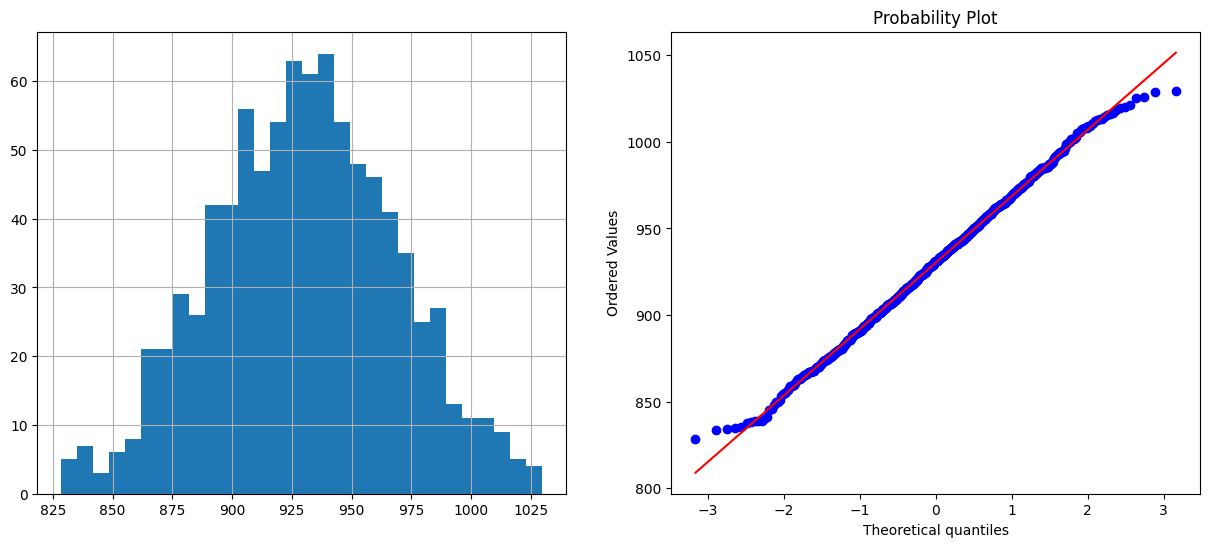

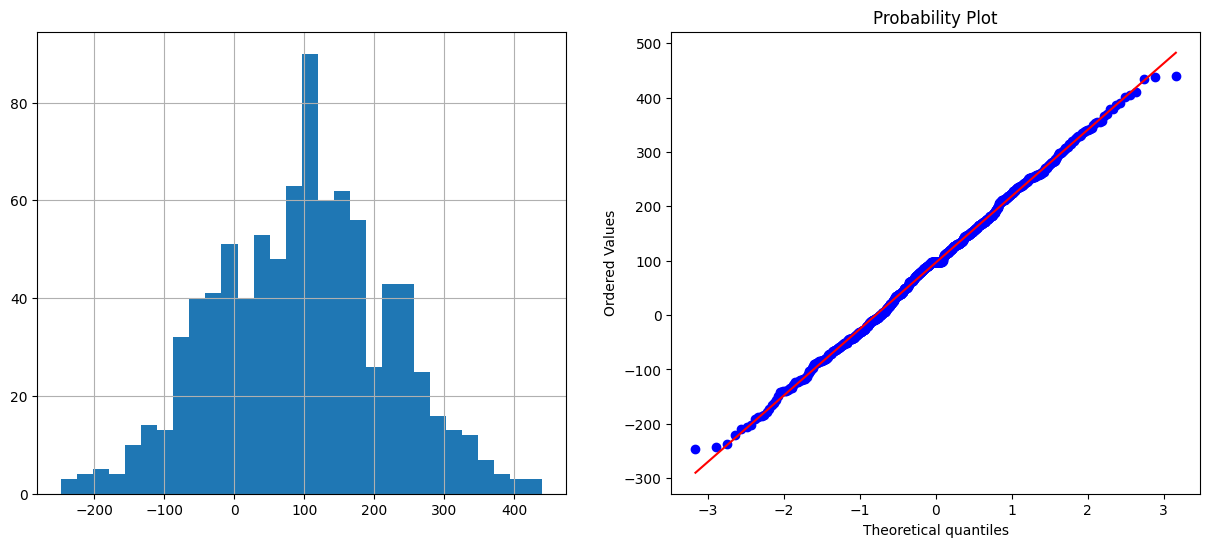

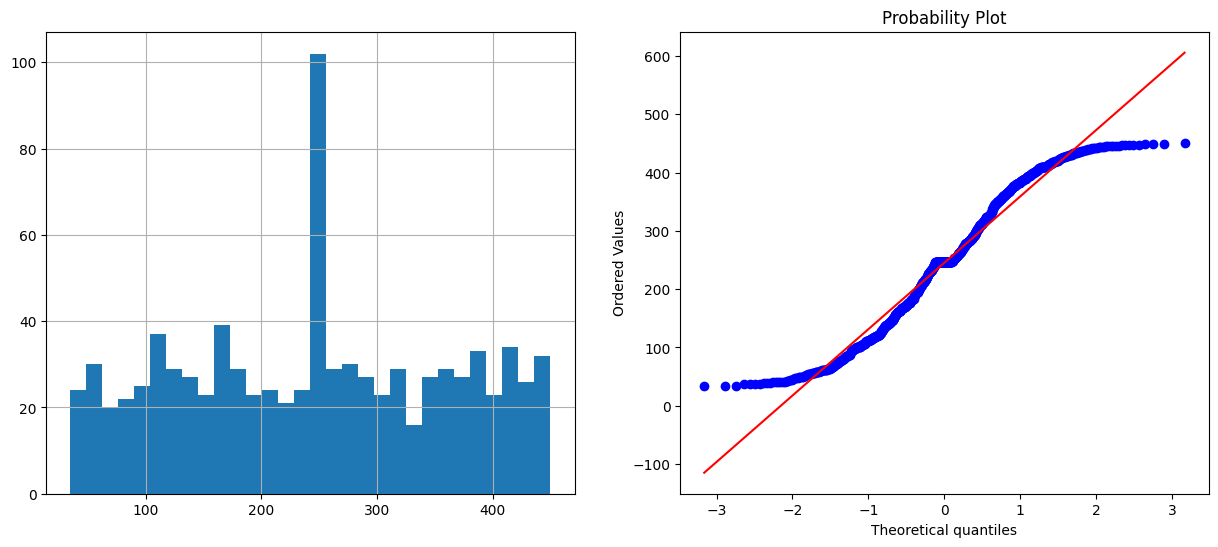

In [179]:
# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º –∫–æ–ª–æ–Ω–∫–∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º

columns_to_scale = ['num1_7', 'num2_7', 'num3_7']
data5_st = data5[columns_to_scale]
data5_scaled = scaler.fit_transform(data5_st)
data5[columns_to_scale] = data5_scaled

for i in columns_to_scale:
    data5[i], param = stats.yeojohnson(data5[i]) 
    
data5[columns_to_scale] = scaler.inverse_transform(data5[columns_to_scale])

diagnostic_plots(data5['num1_7'])
diagnostic_plots(data5['num2_7'])
diagnostic_plots(data5['num3_7'])